In [1]:
# # 整理文件
# import os
# import shutil

# # 获取当前目录
# current_path = "C:\\Users\\zyx\\Desktop\\data\\CO_and_HCO\\HCOp"
# print('当前目录：' + current_path)

# # 获取当前目录下的所有文件名
# filename_list = os.listdir(current_path)
# print('当前目录下文件：', filename_list)
# print('正在分类整理进文件夹中...')

# # 遍历文件名列表
# for filename in filename_list:
#     if filename[-11]=="5":
#         # 移动文件到相应的文件夹
#         shutil.move(current_path + '\\' + filename, "C:\\Users\\zyx\\Desktop\\data\\CO_and_HCO\\HCOp_0.5arc")
#         print(filename + '转移成功！')
#     elif filename[-11]=="0":
#         shutil.move(current_path + '\\' + filename, "C:\\Users\\zyx\\Desktop\\data\\CO_and_HCO\\HCOp_10arc")
#         print(filename + '转移成功！')

# print('整理完毕！')


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import copy
from adjustText import adjust_text
from scipy.signal import find_peaks

In [3]:
file_path = "C:\\Users\\zyx\\Desktop\\data\\CO_and_HCO\\source.vsys.dat"
import pandas as pd

# 假设文件格式：
# 列名: ID   Vsys   RA    Dec
# 数据: 001  250.3  12.5  30.0
# 注释行以 '#' 开头

df = pd.read_csv(
    file_path,
    sep='\s+',          # 按空格/制表符分隔
    comment='#',        # 忽略注释行
    header=0,           # 第一行为列名
    #names=['ID', 'Vsys', 'RA', 'Dec']  # 可选：手动指定列名
)

print(df)   # df.head()则默认输出前五行数据，在数据量大的时候可以方便检查

   source, field,        ra,       dec,       Vsys,  Vsys_sigma
0     Ll01   Ll01  81.505174 -67.503328  287.328125    0.983483
1     Ll02   Ll02  73.534500 -66.775389  274.113342    1.343082
2     Ll03   Ll03  84.478441 -69.576586  265.006836    0.913653
3     Ll04   Ll04  75.983875 -67.344111  269.604950    2.035654
4   Ll04_2   Ll04  75.982767 -67.345826  268.652863    1.179893
..     ...    ...        ...        ...         ...         ...
66     S07    S07  13.514352 -73.327366  163.216629    1.475220
67     S08    S08  12.257295 -73.186037  146.751221    1.218433
68     S09    S09  11.235079 -73.169770  132.257156    2.265169
69     S10    S10  16.280342 -71.995208  189.761490    1.967455
70   S10_2    S10  16.274230 -71.995216  190.884918    1.150420

[71 rows x 6 columns]


In [4]:
print(df.columns)
print(type(df))

Index(['source,', 'field,', 'ra,', 'dec,', 'Vsys,', 'Vsys_sigma'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [5]:
sou=df["source,"].tolist()
V=df["Vsys,"].tolist()
print(sou)
print(V)
print(type(sou))
print(type(V))

['Ll01', 'Ll02', 'Ll03', 'Ll04', 'Ll04_2', 'Ll05', 'Ll06', 'Ll06_2', 'Ll06_3', 'Ll07', 'Ll07_2', 'Ll08', 'Ll09', 'Ll09_2', 'Ll09_3', 'Ll09_4', 'Ll09_5', 'Ll10', 'Ll10_2', 'Lm01', 'Lm02', 'Lm02_2', 'Lm02_3', 'Lm03', 'Lm04', 'Lm04_2', 'Lm04_3', 'Lm05', 'Lm05_2', 'Lm05_3', 'Lm06', 'Lm06_2', 'Lm06_3', 'Lm07', 'Lm07_2', 'Lm07_3', 'Lm08', 'Lm09', 'Lm10', 'Lh01', 'Lh01_2', 'Lh01_3', 'Lh02', 'Lh02_2', 'Lh02_3', 'Lh03', 'Lh04', 'Lh05', 'Lh05_2', 'Lh05_3', 'Lh05_4', 'Lh06', 'Lh07', 'Lh08', 'Lh08_2', 'Lh08_3', 'Lh08_4', 'Lh09', 'Lh10', 'S01', 'S01_2', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S10_2']
[287.328125, 274.1133423, 265.0068359, 269.60495, 268.6528625, 274.9273682, 231.8370972, 232.4548035, 235.1858368, 267.088623, 266.247467, 235.3066406, 283.1570435, 282.2198181, 285.8900146, 279.8934326, 281.043335, 249.9293213, 249.9293213, 276.4645691, 230.7684784, 230.9107971, 229.9667053, 296.7356262, 283.2704773, 282.0755615, 284.4465637, 236.2545319, 237.4716644, 233.84242

In [6]:
def open_file():
    path='C:\\Users\\zyx\\Desktop\\data\\CO_and_HCO\\HCOp_0.5arc'  #设置存储路径
    files= os.listdir(path) #得到文件夹下的所有文件名称
    name_list=source_name(files) # 得到每个源的名字
    data=[]  # 建立空列表储存数据
    data_i=0 # 记录是第几个文件

    for file in files:  #按照顺序在 files 里面进行每一个文件的 数据名称 循环读取
        position = path+"\\"+file   # 打开第一个文件
        data.append([])
        with open(position, 'r') as f:
            line_num=0
            for line in f:
                if line_num>0:
                    data[data_i].append(line.strip().split())
                line_num+=1
        data_i+=1
    return data,name_list

In [7]:
def source_name(name):
    name_list=[]
    for i in range(len(name)):
        part=name[i].split(".")
        name_list.append(part[1])
    return name_list

In [8]:
def data_to_xy(data):   # 输入某一个文件的数据，转换成xy
    data_x=[]
    data_y=[]
    for i in range(len(data)):
        data_x.append(float(data[i][0]))
        data_y.append(float(data[i][1]))
    return data_x,data_y

In [9]:
def paint(x,y):    # 把光谱画出来
    plt.plot(x,y)
    plt.xlabel("velocity (km/s)")
    plt.ylabel("flux (Jy/beam)")
    #plt.autoscale(enable=True, axis='y', tight=True)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

In [10]:
def noise_sigma(raw_data,a):
    noise=raw_data[a:a+100]    #宽度为0.2Hz的噪声区间
    noise_x,noise_y=data_to_xy(noise)
    paint(noise_x,noise_y)
    return noise_y

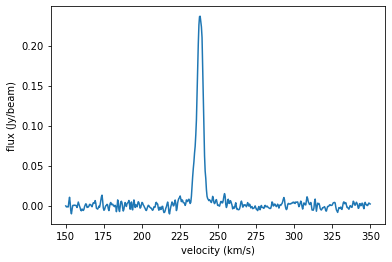

0
Lh01
488


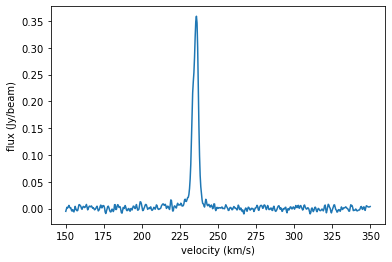

1
Lh01_2
488


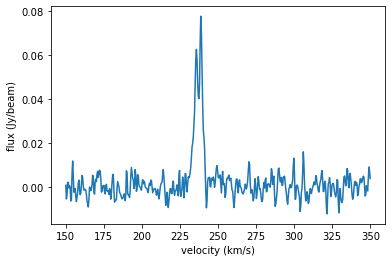

2
Lh01_3
488


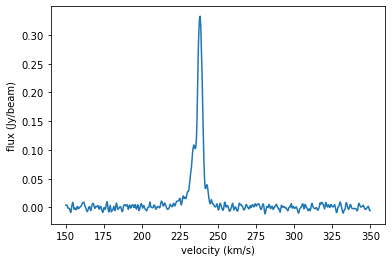

3
Lh02
488


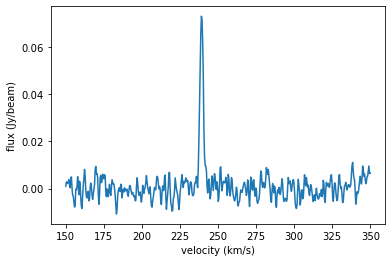

4
Lh02_2
488


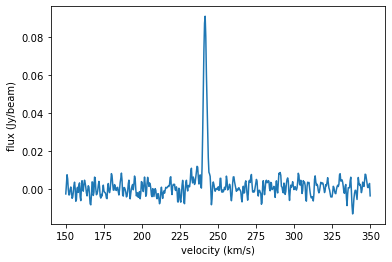

5
Lh02_3
488


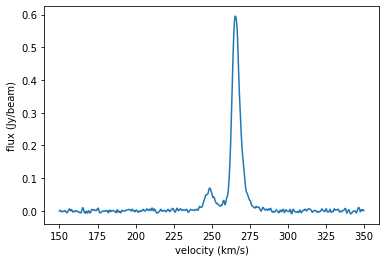

6
Lh03
488


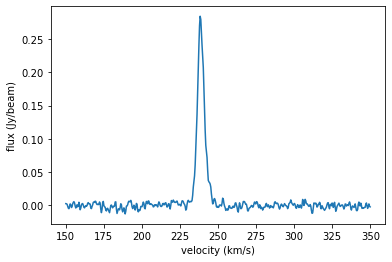

7
Lh04
488


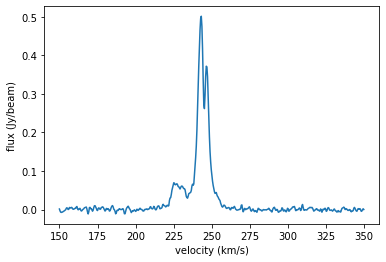

8
Lh05
488


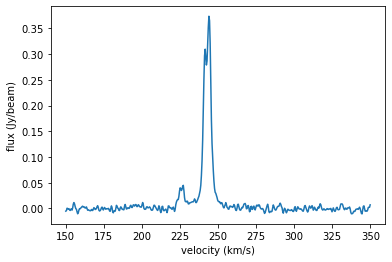

9
Lh05_2
488


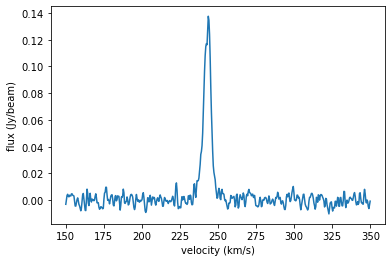

10
Lh05_3
488


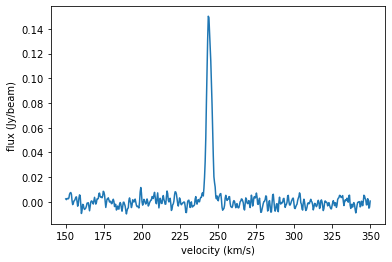

11
Lh05_4
488


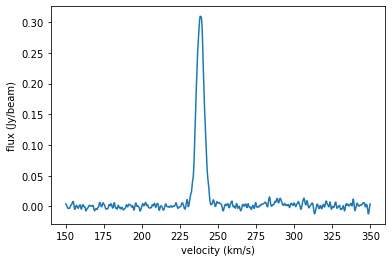

12
Lh06
488


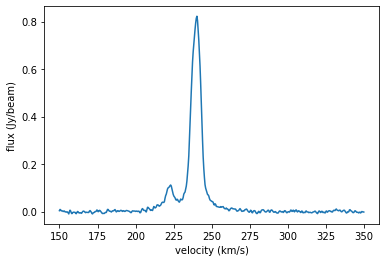

13
Lh07
488


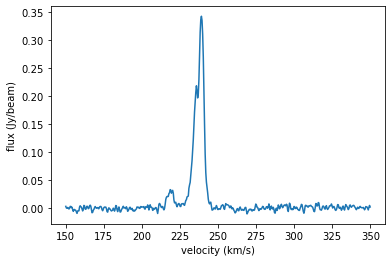

14
Lh08
488


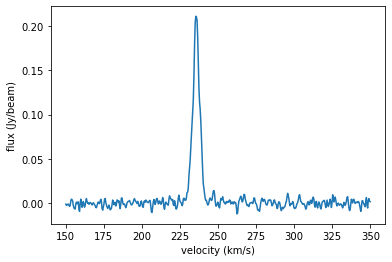

15
Lh08_2
488


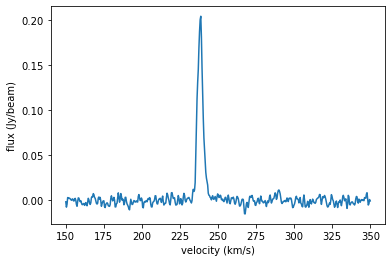

16
Lh08_3
488


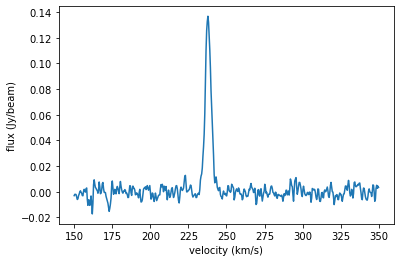

17
Lh08_4
488


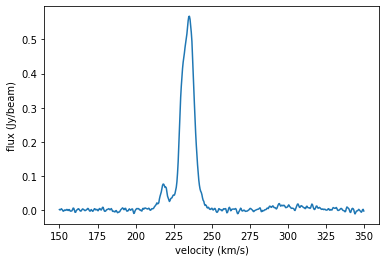

18
Lh09
488


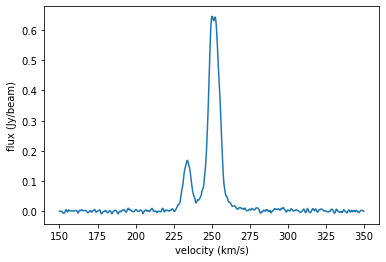

19
Lh10
488


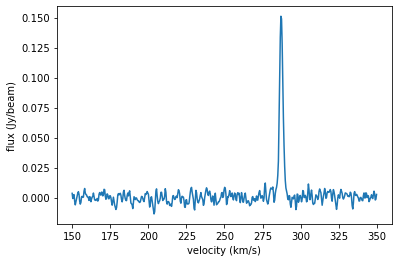

20
Ll01
488


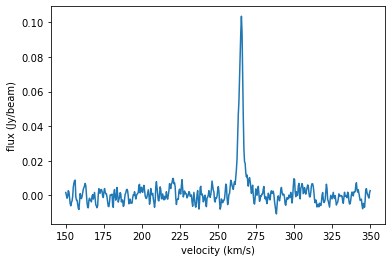

21
Ll03
488


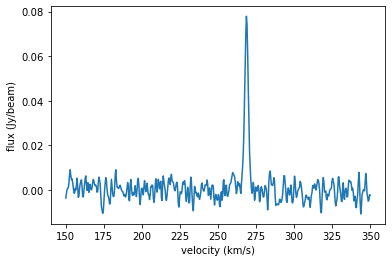

22
Ll04_2
488


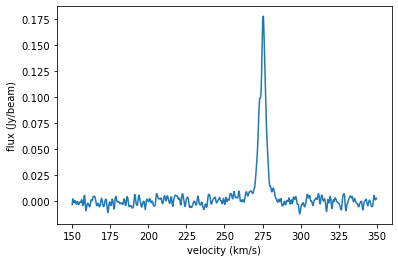

23
Ll05
488


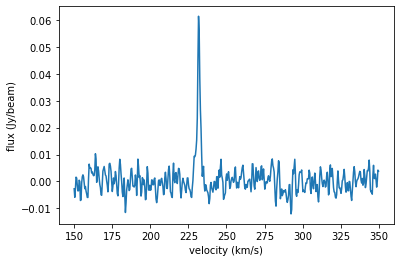

24
Ll06
488


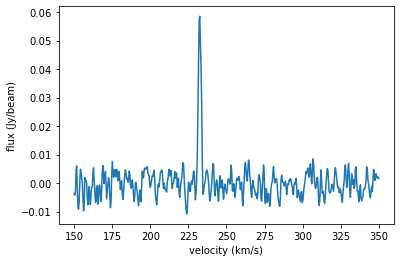

25
Ll06_2
488


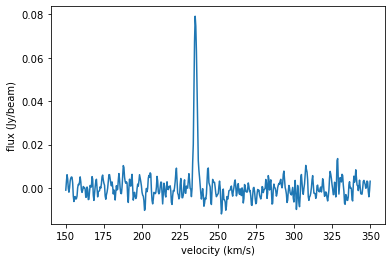

26
Ll06_3
488


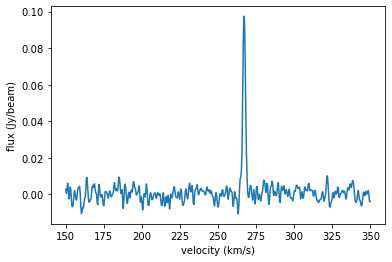

27
Ll07
488


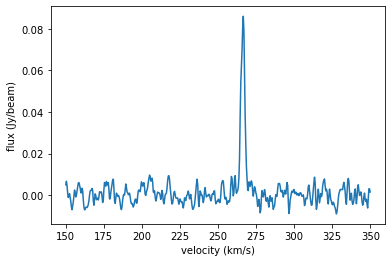

28
Ll07_2
488


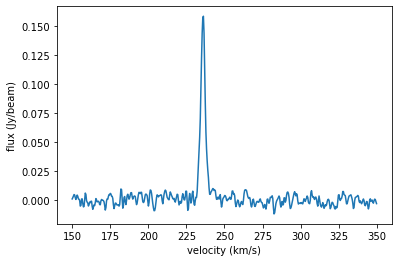

29
Ll08
488


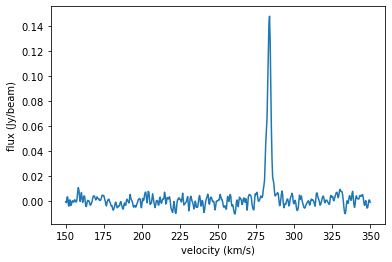

30
Ll09
488


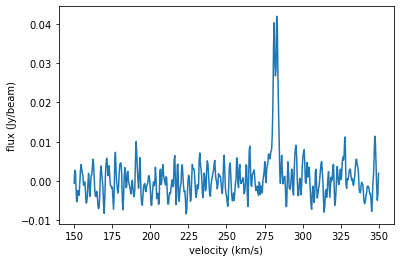

31
Ll09_2
488


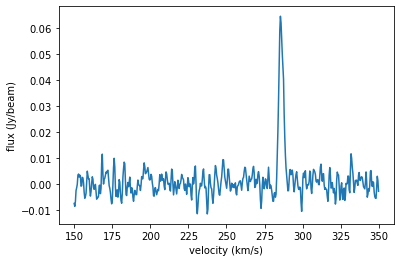

32
Ll09_3
488


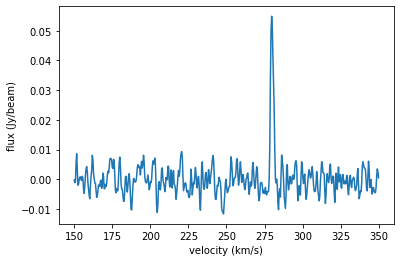

33
Ll09_4
488


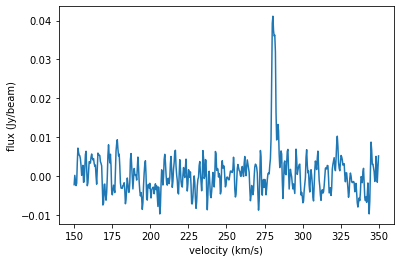

34
Ll09_5
488


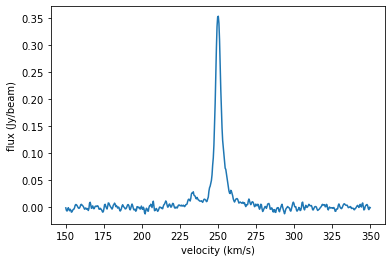

35
Ll10
488


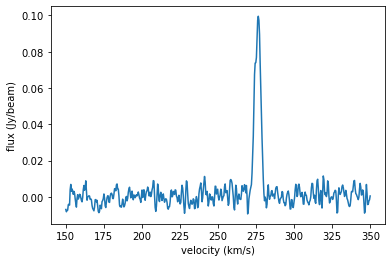

36
Lm01
488


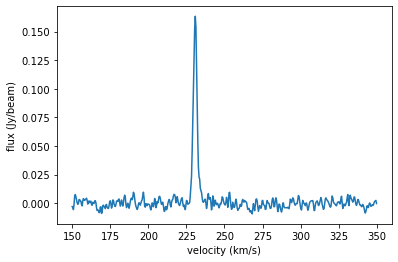

37
Lm02
488


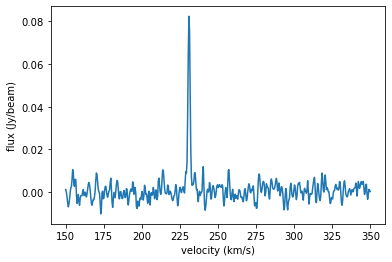

38
Lm02_2
488


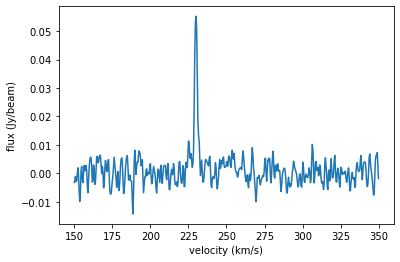

39
Lm02_3
488


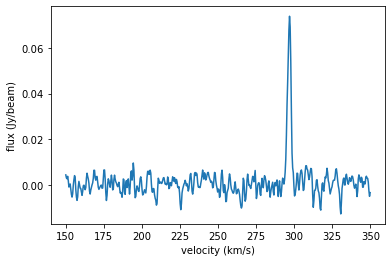

40
Lm03
488


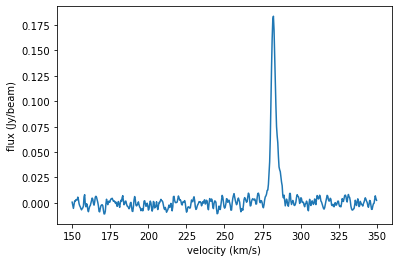

41
Lm04
488


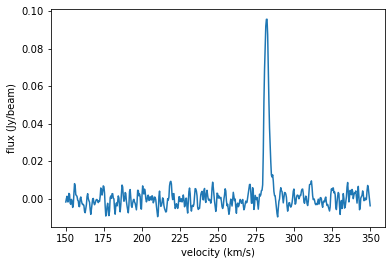

42
Lm04_2
488


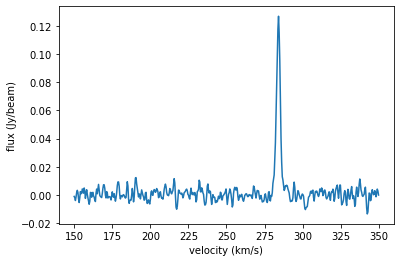

43
Lm04_3
488


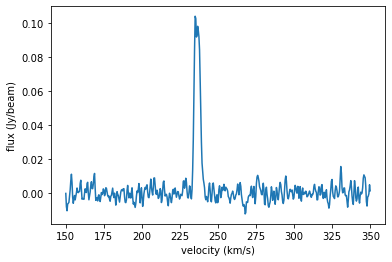

44
Lm05
488


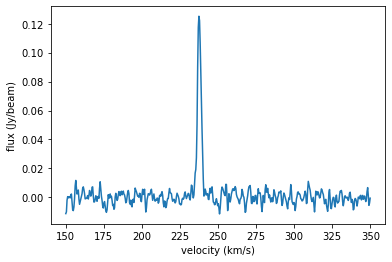

45
Lm05_2
488


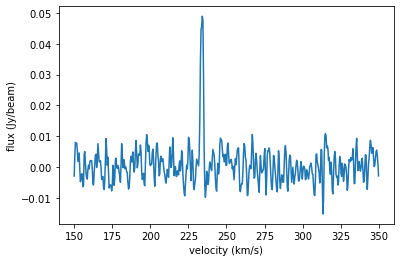

46
Lm05_3
488


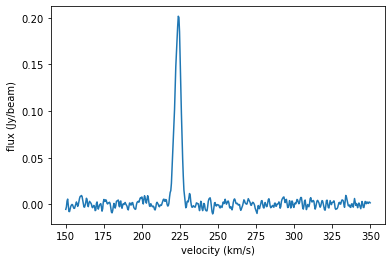

47
Lm06
488


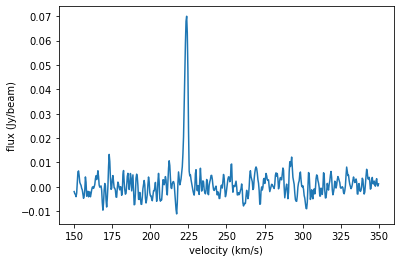

48
Lm06_2
488


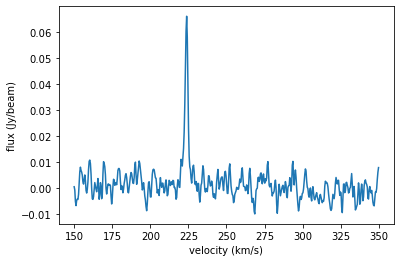

49
Lm06_3
488


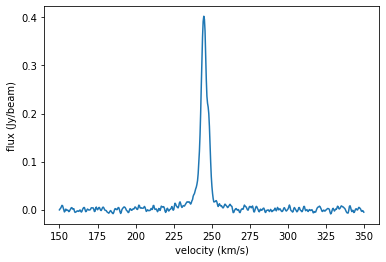

50
Lm07
488


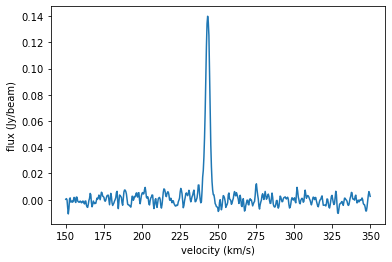

51
Lm07_2
488


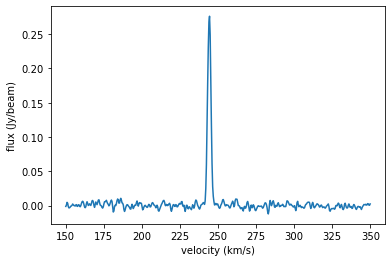

52
Lm07_3
488


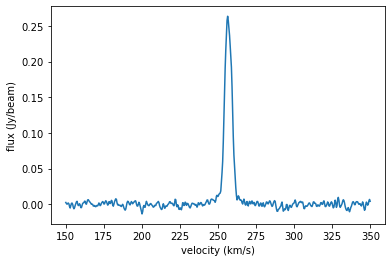

53
Lm08
488


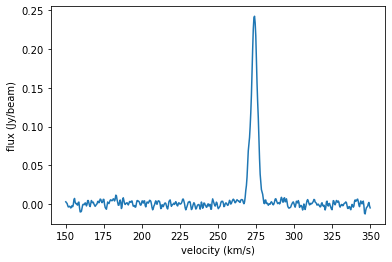

54
Lm09
488


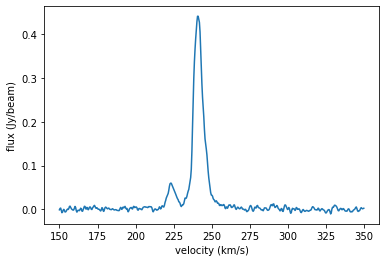

55
Lm10
488


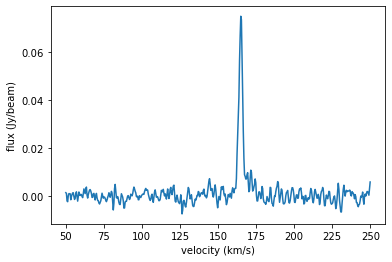

56
S01
488


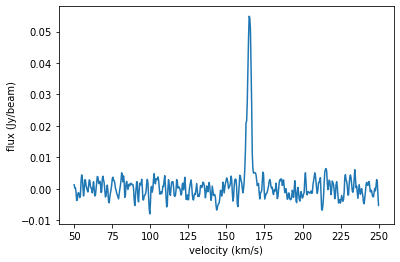

57
S01_2
488


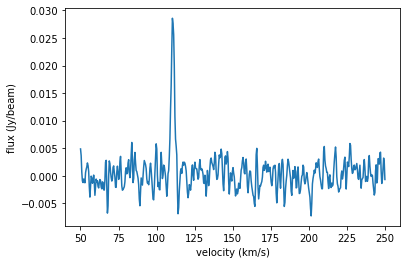

58
S02
488


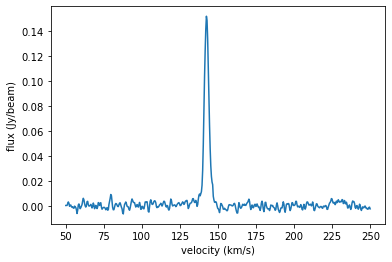

59
S03
488


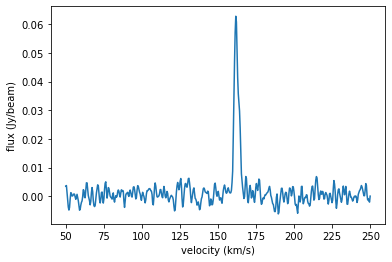

60
S04
488


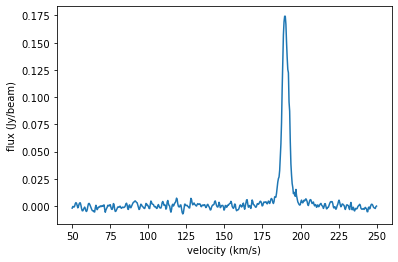

61
S05
488


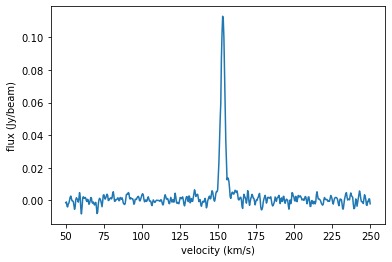

62
S06
488


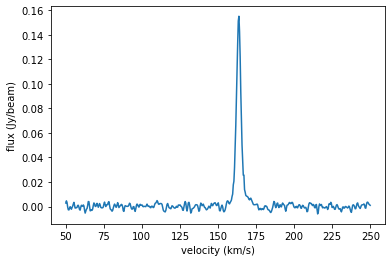

63
S07
488


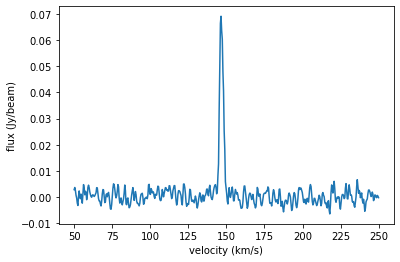

64
S08
488


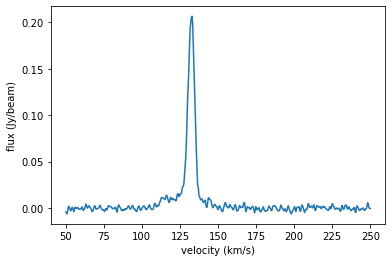

65
S09
488


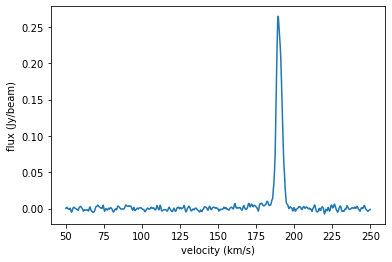

66
S10
488


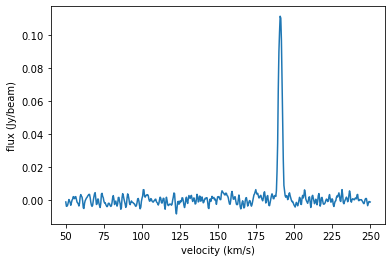

67
S10_2
488
68
68
68
68


In [11]:
data,name_list=open_file()
data.pop(21)
name_list.pop(21)
data.pop(22)
name_list.pop(22)
data.pop(36)
name_list.pop(36)
# print(data)
# print(len(data))
for i in range(len(data)):
    x,y=data_to_xy(data[i])
    paint(x,y)
    print(i)
    print(name_list[i])
    print(len(data[i]))
print(len(data))
print(len(name_list))
print(len(data))
print(len(name_list))

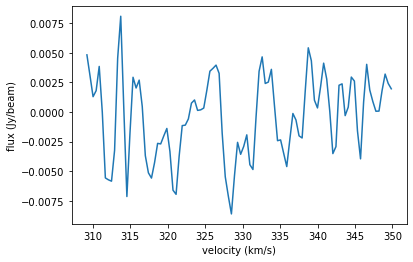

0


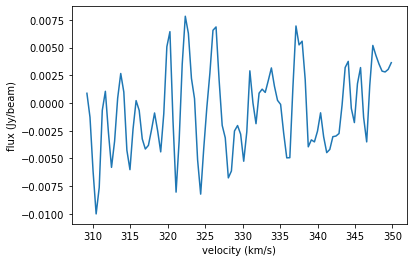

1


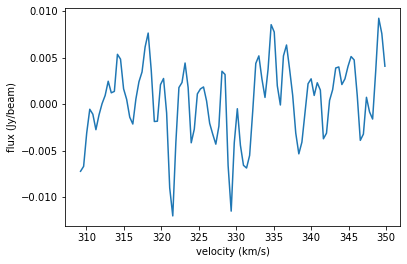

2


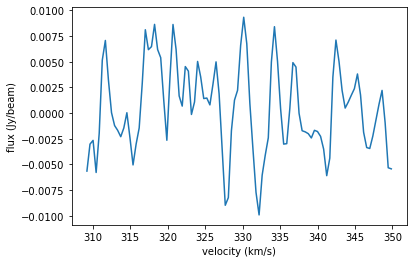

3


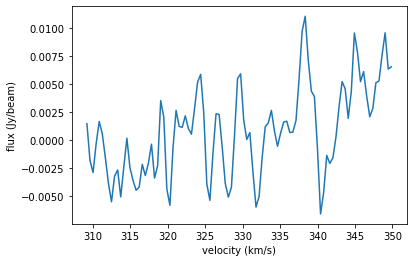

4


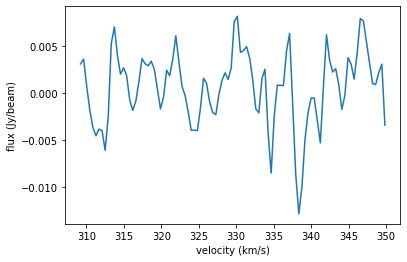

5


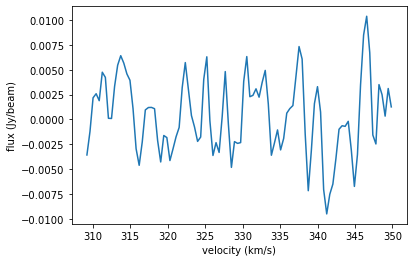

6


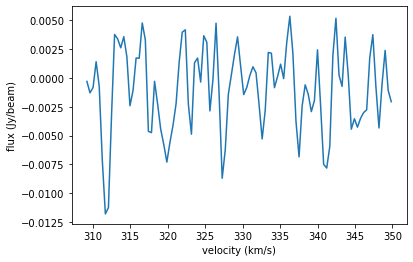

7


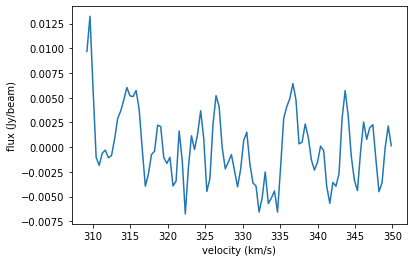

8


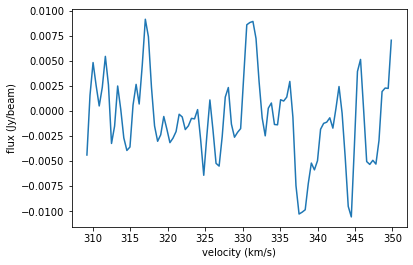

9


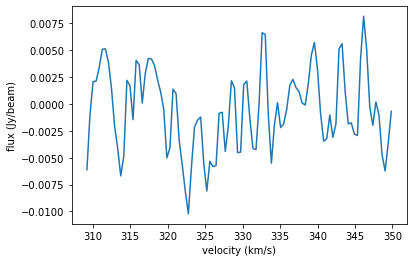

10


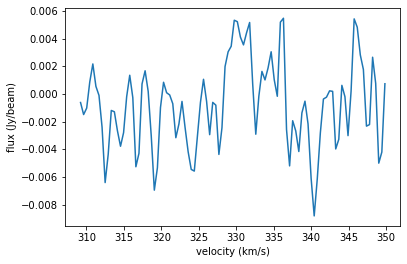

11


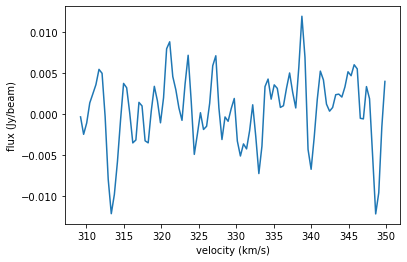

12


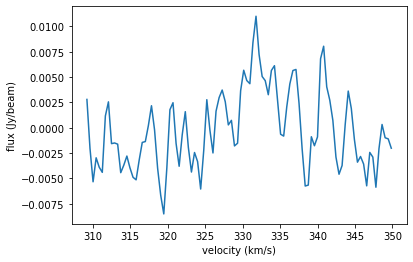

13


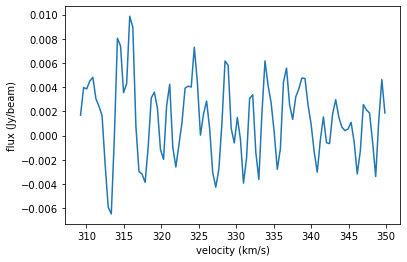

14


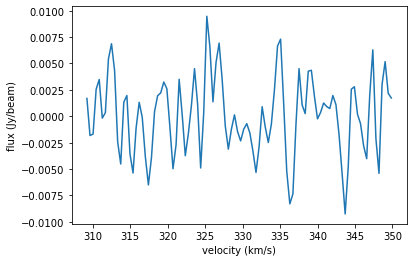

15


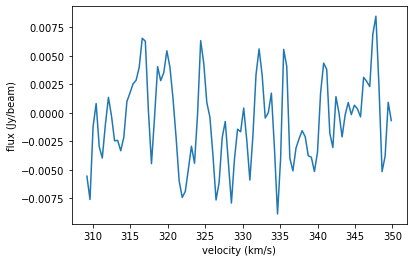

16


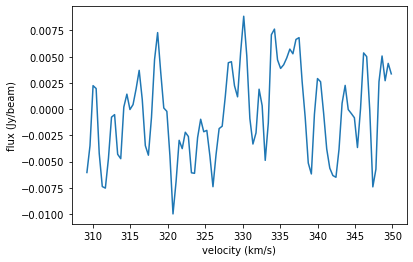

17


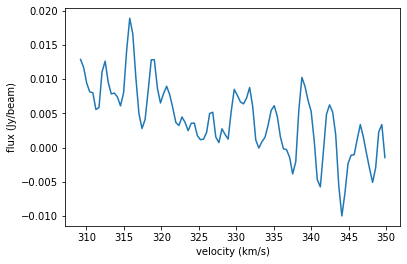

18


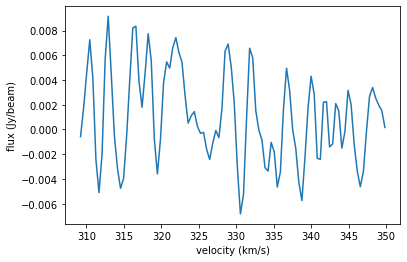

19


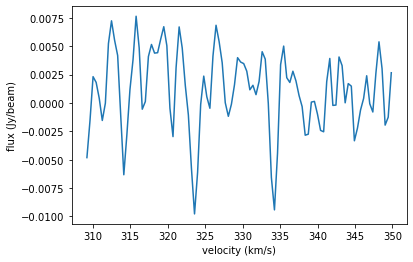

20


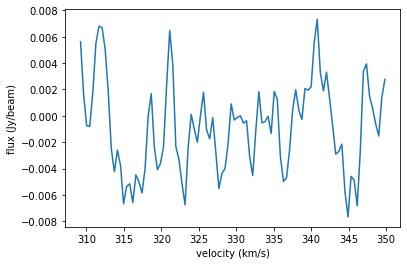

21


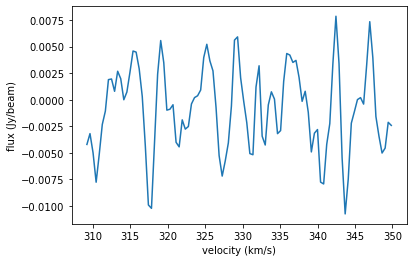

22


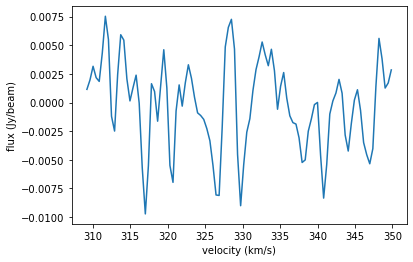

23


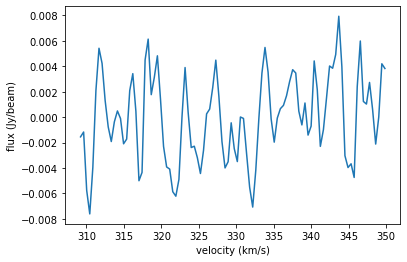

24


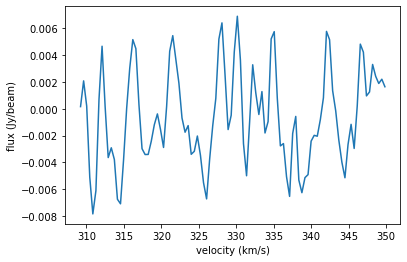

25


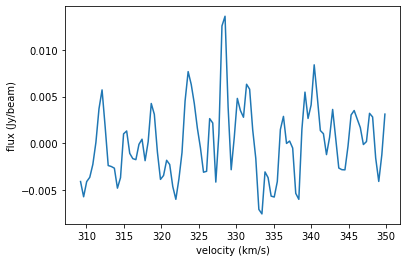

26


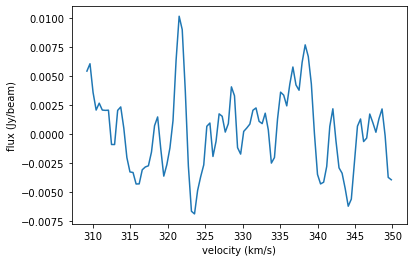

27


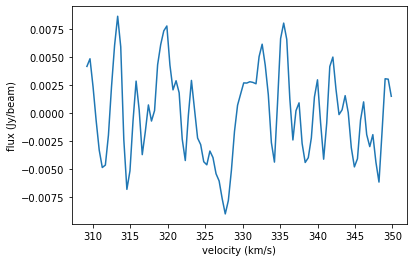

28


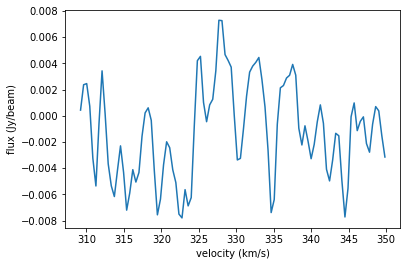

29


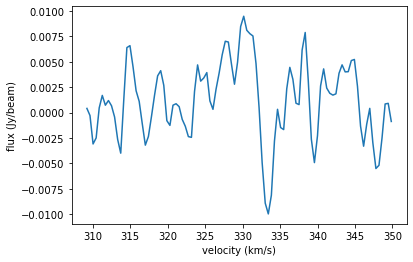

30


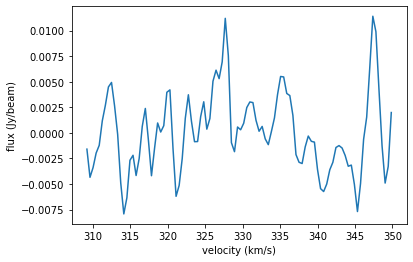

31


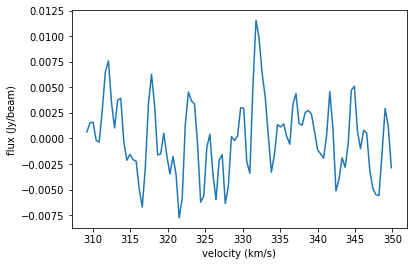

32


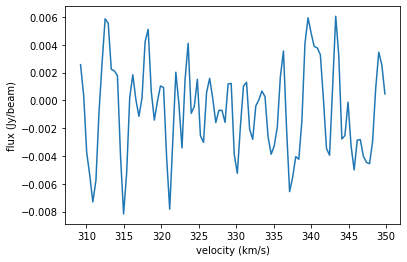

33


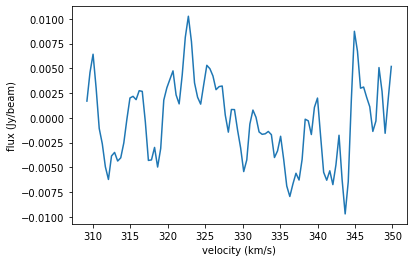

34


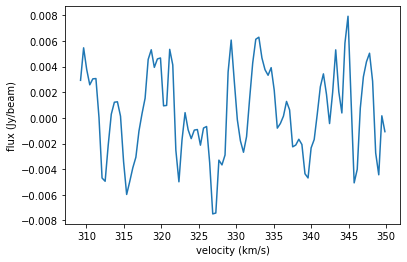

35


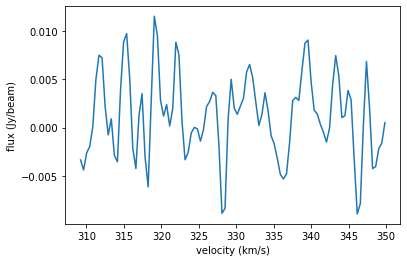

36


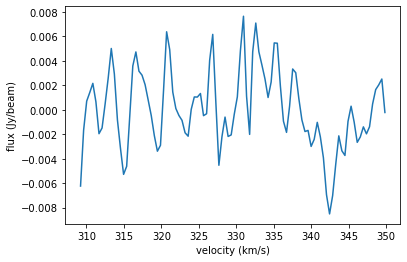

37


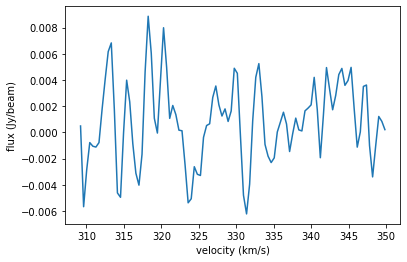

38


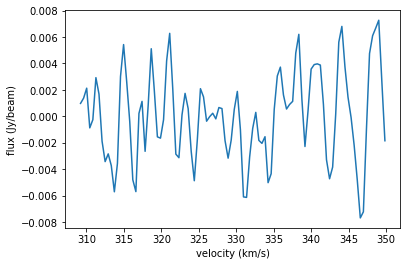

39


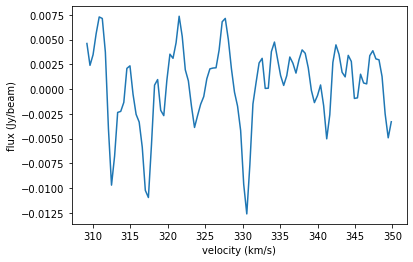

40


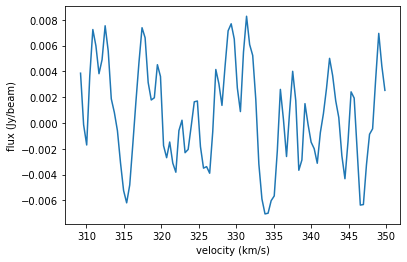

41


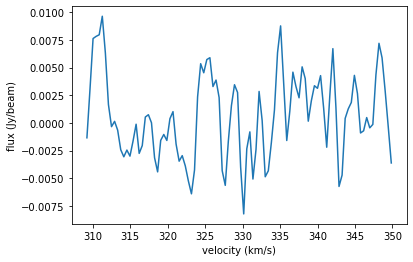

42


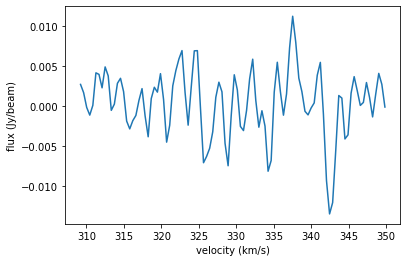

43


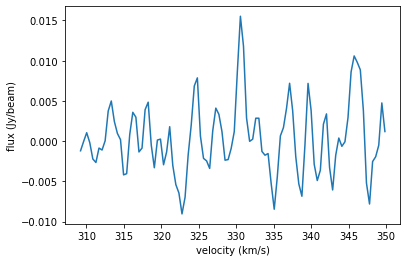

44


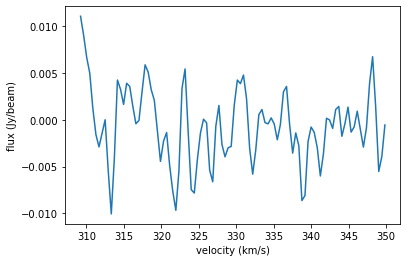

45


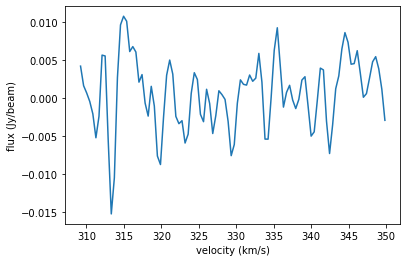

46


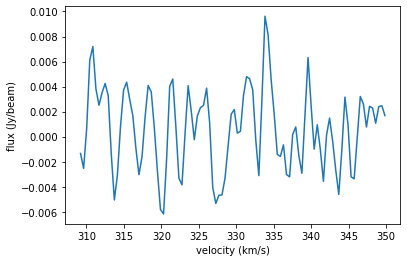

47


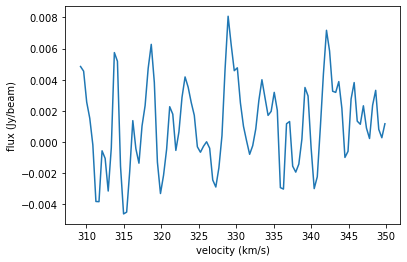

48


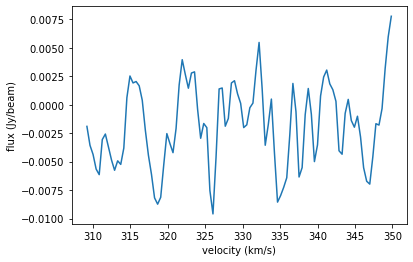

49


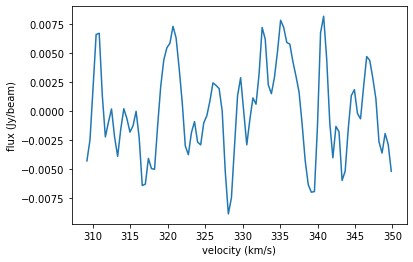

50


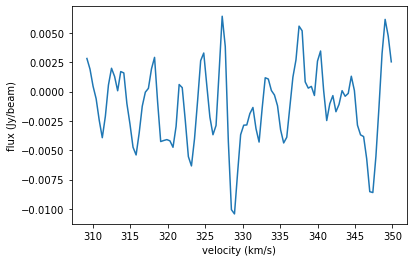

51


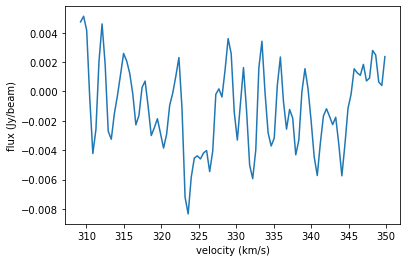

52


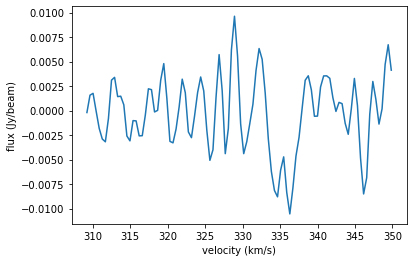

53


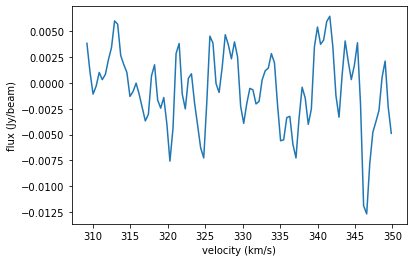

54


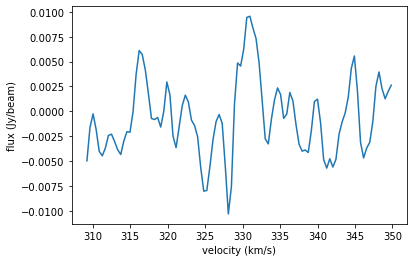

55


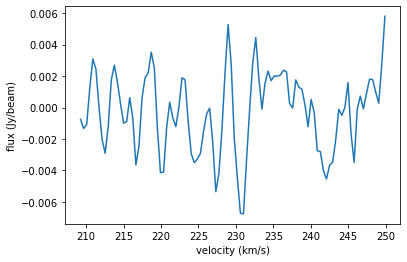

56


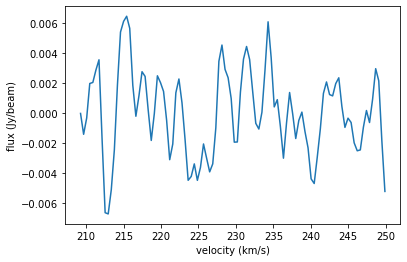

57


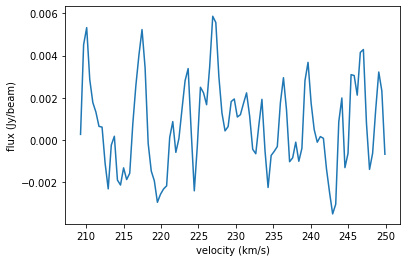

58


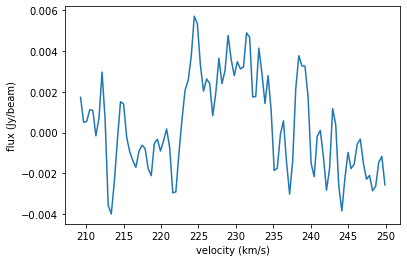

59


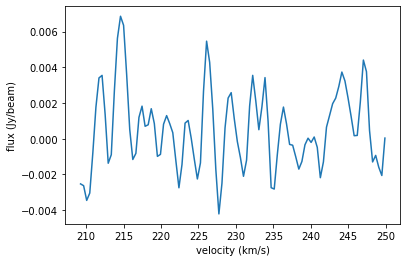

60


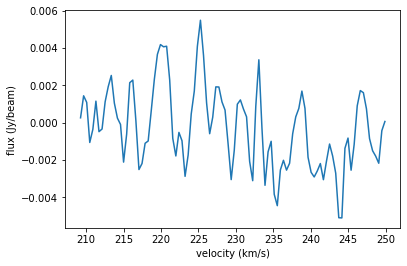

61


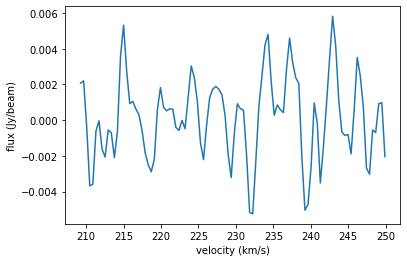

62


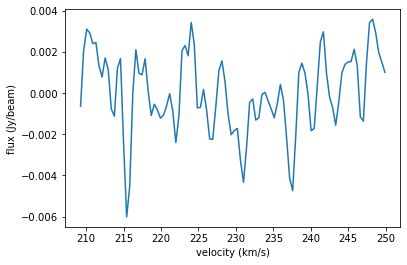

63


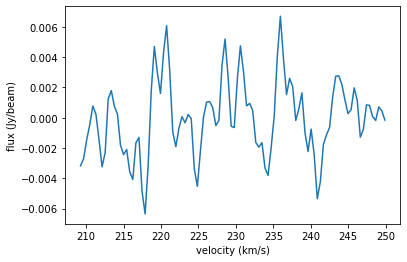

64


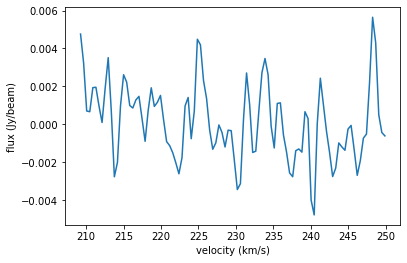

65


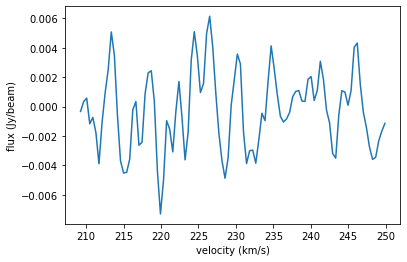

66


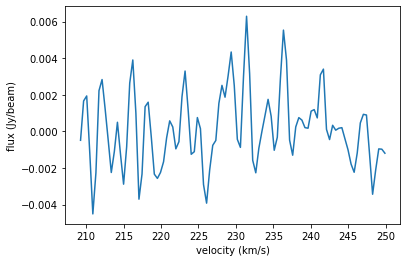

67
[0.003406014862090709, 0.0038166909238733586, 0.004155998418549199, 0.004276413968032803, 0.003999343158310272, 0.0038939497504370552, 0.003826596604047627, 0.003620638163540076, 0.003646219155687551, 0.004200550191835665, 0.003756757291053621, 0.0030975586122480117, 0.004380765035025695, 0.003852017551706516, 0.0032026897350043077, 0.0036527583805820722, 0.0037746781605008275, 0.004245140225791969, 0.005111270618069422, 0.003678487224506193, 0.0034786375255723414, 0.003437285886893133, 0.003976651589112641, 0.003826240142264113, 0.003363110007408923, 0.00353096151373697, 0.0039531514773949745, 0.0034335713388028892, 0.0039530918751454515, 0.0035961533823008086, 0.0038023089151372836, 0.0038804981061635164, 0.0036705096105174393, 0.0032654357548908353, 0.00410609809922525, 0.003421903546262649, 0.004298839845436247, 0.00317064244210872, 0.0031137397028193144, 0.0033722067698498896, 0.004056955670302466, 0.0038945223047567603, 0.0037868638910701848, 0.004157912189458688, 0.0044915150

In [12]:
# 计算每一条谱线噪声的σ
noise_list=[]
for i in range(len(data)):
    noise_y=noise_sigma(data[i],0)
    print(i)
    noise_level=np.std(noise_y)
    noise_list.append(noise_level)
print(noise_list)

In [13]:
# 去掉3σ外的数据（把噪声3σ下的删掉）（没有合并时）
def remove_3sigma3(list1,list2,noise):
    list3=copy.deepcopy(list2)
    a=max(list2)
    n_a=list2.index(a)
# 从最大值开始往左边找
    for i in range(n_a-1,-1,-1):
        if list3[i]<noise*3 and list3[i-1]<noise*4 and list3[i-2]<noise*4 and list3[i-3]<noise*4:
            print("去除噪声（左边）")
            for j in range(i):
                list3[j]=0
            break
# 从最大值开始往右边找
    for i in range(n_a,len(list3)):
        if list3[i]<noise*3 and list3[i+1]<noise*3:
            if i+6<len(list3):
                if list3[i+2]<noise*3 and list3[i+6]<noise*3:
                    print("去除噪声（右边）")
                    for j in range(i,len(list3)):
                        list3[j]=0
            elif i+6>=len(list3):
                print("去除噪声（右边）")
                for j in range(i,len(list3)):
                    list3[j]=0
            break
    return list3

In [14]:
def hebin(list_x,list_y):    # 把列表每三个数据合成一个
    list_x_new=[]
    list_y_new=[]
    for i in range(int(len(list_x)/3)):
        x0=list_x[3*i]
        x1=list_x[3*i+1]
        x2=list_x[3*i+2]
        y0=list_y[3*i]
        y1=list_y[3*i+1]
        y2=list_y[3*i+2]
        list_x_new.append((x0+x1+x2)/3)
        list_y_new.append((y0+y1+y2)/3)
    return list_x_new,list_y_new

In [15]:
def set_noise_to_zero(y,min_peak_height=0.1):
    """
    将噪声部分设为0，同时保留小峰。
    
    参数:
        x (np.array): 波长/横坐标数据。
        y (np.array): 强度/纵坐标数据。
        window_size (int): 局部窗口大小。
        threshold_multiplier (float): 阈值倍数（默认3σ）。
        min_peak_height (float): 小峰的最小高度。
    
    返回:
        tuple: (x, y_clean) 处理后的数据。
    """
    # 计算局部噪声阈值
    thresholds = noise_level*3
    
    # 使用峰值检测算法识别小峰
    peaks, _ = find_peaks(y, height=min_peak_height)
    
    
    # 创建掩码：保留高于阈值或属于小峰且非异常值的数据点
    mask = ((y > thresholds) | np.isin(np.arange(len(y)), peaks)) 
    
    # 将噪声部分设为0
    y_clean = np.where(mask, y, 0)
    
    return y_clean

In [16]:
# 归一化
def guiyihua(list5):
    a_max=max(list5)
    list6=[]
    for i in range(len(list5)):
        list6.append(list5[i]/a_max)
    return list6

In [17]:
# 放大谱线
def enlarge3(x,y):
    m=max(y)
    index_m=y.index(m)
    data_x=x[index_m-80:index_m+80]
    data_y=y[index_m-80:index_m+80]
    return data_x,data_y

In [18]:
# 找到每个源的视向速度
def Vsys(name,source,V):
    V_rest_source=[]
    for i in range(len(name)):
        for j in range (len(source)):
            if name[i]==source[j]:
                V_rest_source.append(V[j])
                break
    return V_rest_source
                

In [19]:
def duiqi_v(list_x,list_y):
    delta_x=0.42336   # 步长
    x_start=-40 
    x_finish=40
    num=int((x_finish-x_start)/delta_x)+1  # 对齐之后数据长度
    y_flux=[]   # 对齐横坐标之后，只需要记录纵坐标。这是纵坐标。
    find_x=[]
    find_y=[]
    find_x=copy.deepcopy(list_x)
    find_y=copy.deepcopy(list_y)
    print(type(find_x))
    for i in range(num):
        a=x_start+i*delta_x
        b=x_start+(i+1)*delta_x
        #print("开始")
    # 找原横坐标对应区间(比如新x轴在【-26.4，-26】区间内的数据，就要找到原来x轴位于该区间的数据)
        if len(find_x)>=3:        # 原来x轴的数据还剩下3个以上
            data1_x=find_x[0]
            data2_x=find_x[1]
            data3_x=find_x[2]
            #print(data1_x)
            if data1_x>=a and data1_x<=b and data2_x>=b:
                y_flux.append(find_y[0])
                find_x.remove(data1_x)   # 把已经找到的数据删掉
                find_y.remove(find_y[0])
                #print("进入了第一种情况")
                continue
            elif data1_x>b:
                y_flux.append(0)
                #print("有0")
#                 print(n)
#                 print(data1_x,data2_x,data3_x)
#                 print(a,b)
                continue
            elif data1_x>=a and data2_x<=b and data3_x>b:
                y_flux.append((find_y[0]+find_y[1])/2)
                find_x.remove(data1_x)
                find_x.remove(data2_x)
                find_y.remove(find_y[0])
                find_y.remove(find_y[0])
                #print("进入了第三种情况")
                continue

        elif len(find_x)==2:         # 原来x轴的数据还剩下2个
            #print("还有2个数据！")
            data1_x=find_x[0]
            data2_x=find_x[1]
            if data1_x>=a and data1_x<=b and data2_x>=b:
                y_flux.append(find_y[0])
                find_x.remove(data1_x)   # 把已经找到的数据删掉
                find_y.remove(find_y[0])
                #print("进入了第一种情况")
                continue
            elif data1_x>b:
                y_flux.append(0)

                continue
            elif data1_x>=a and data2_x<=b:
                y_flux.append((find_y[0]+find_y[1])/2)
                find_x.remove(data1_x)
                find_x.remove(data2_x)
                find_y.remove(find_y[0])
                find_y.remove(find_y[0])
                #print("进入了第三种情况")
                continue

        elif len(find_x)==1:       # 原来x轴的数据还剩下1个
            #print("还有1个数据！")
            y_flux.append(find_y[0])
            find_x.remove(find_x[0])   # 把已经找到的数据删掉
            find_y.remove(find_y[0])
            continue

        elif len(find_x)==0:
            #print("没有数据了！")
            y_flux.append(0)
        

    #print(y_flux)
    #plt.plot(y_flux)
    return y_flux

In [20]:
V_rest_source=Vsys(name_list,sou,V)
print(V_rest_source)
print(len(V_rest_source))
print(len(data))

[238.1743317, 234.6389618, 237.5957489, 237.2864075, 239.1872101, 241.4568329, 265.6809082, 238.877655, 245.0176086, 243.2062531, 242.8843231, 244.4919128, 238.6717224, 239.5157166, 237.3270874, 236.2345276, 238.1495514, 237.9584656, 235.751358, 251.2273865, 287.328125, 265.0068359, 268.6528625, 274.9273682, 231.8370972, 232.4548035, 235.1858368, 267.088623, 266.247467, 235.3066406, 283.1570435, 282.2198181, 285.8900146, 279.8934326, 281.043335, 249.9293213, 276.4645691, 230.7684784, 230.9107971, 229.9667053, 296.7356262, 283.2704773, 282.0755615, 284.4465637, 236.2545319, 237.4716644, 233.8424225, 223.7095947, 223.3597565, 223.730011, 245.5217133, 243.1546326, 244.2059174, 256.5096436, 273.8621216, 240.6420593, 165.10672, 165.0603485, 110.6276779, 142.4628601, 162.0758209, 190.4225006, 153.1679382, 163.216629, 146.7512207, 132.2571564, 189.7614899, 190.8849182]
68
68


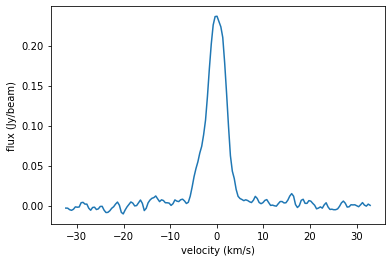

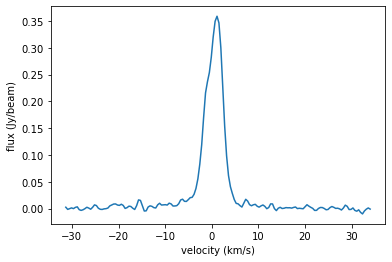

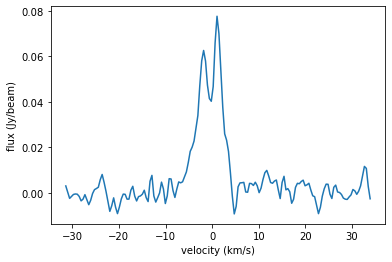

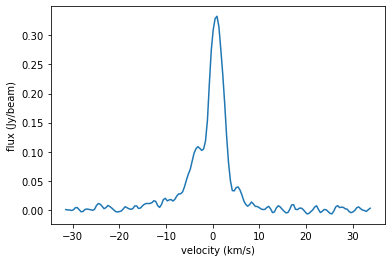

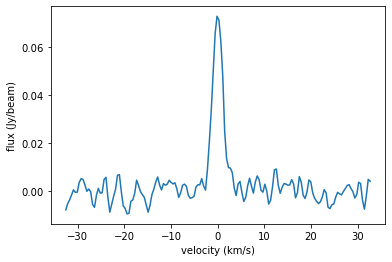

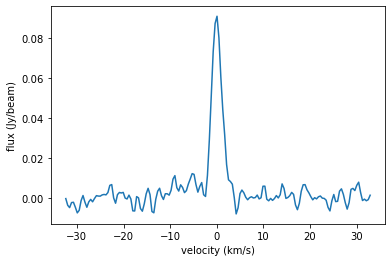

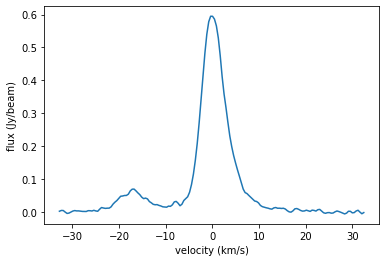

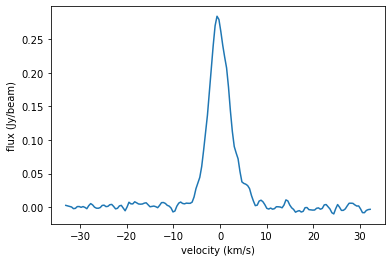

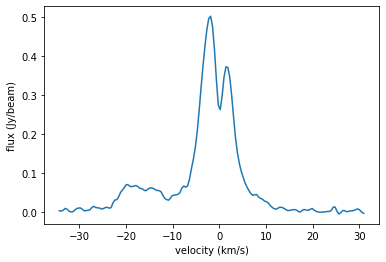

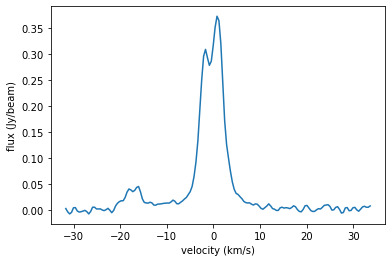

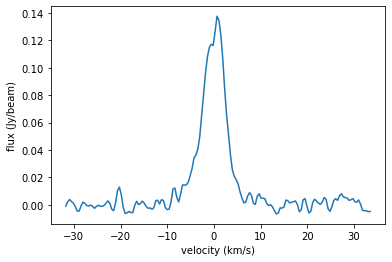

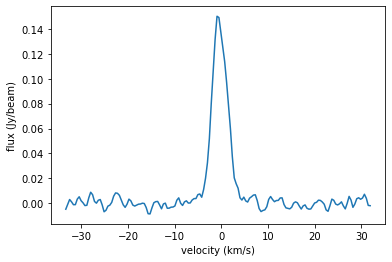

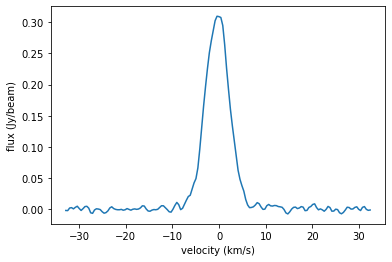

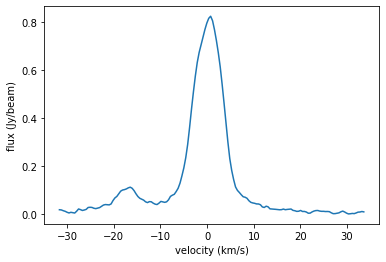

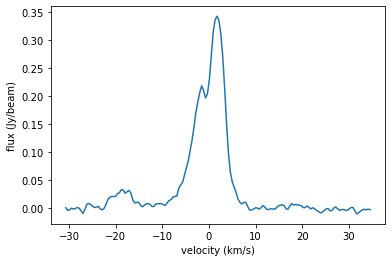

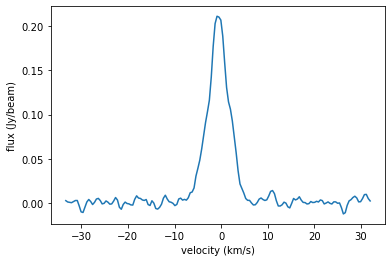

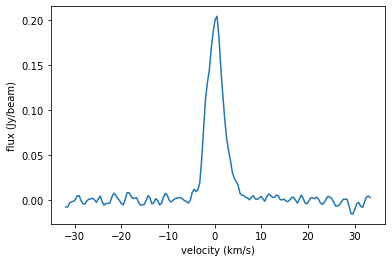

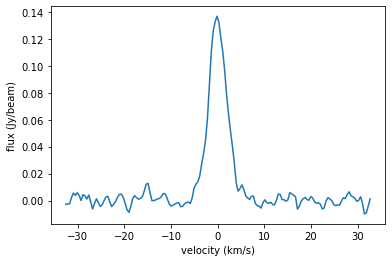

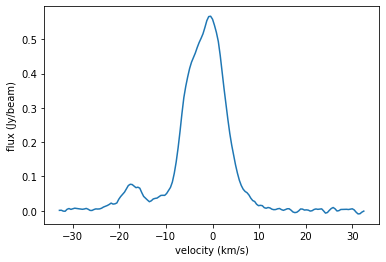

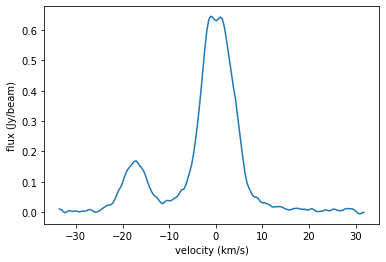

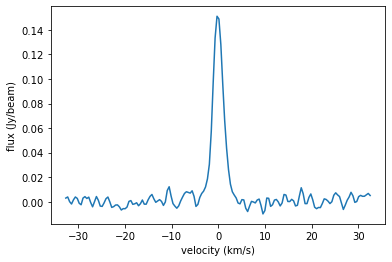

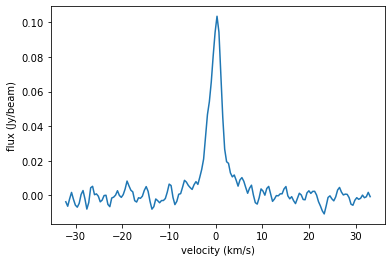

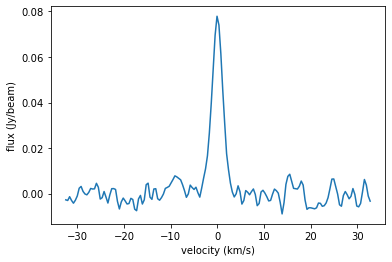

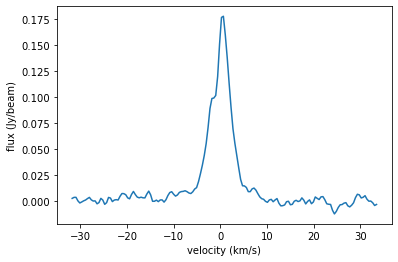

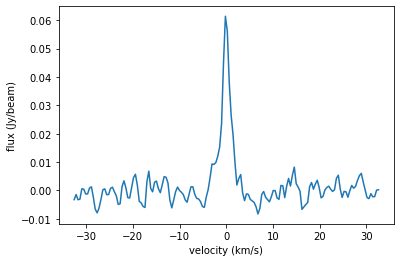

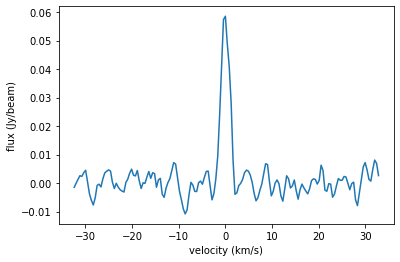

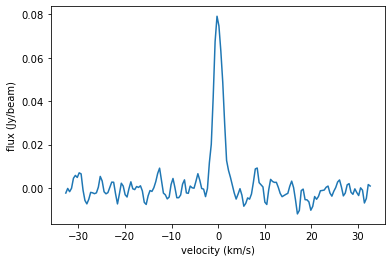

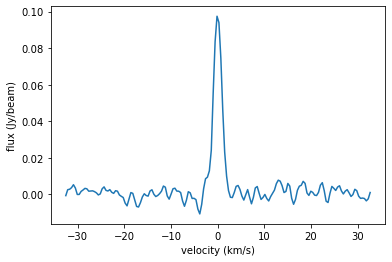

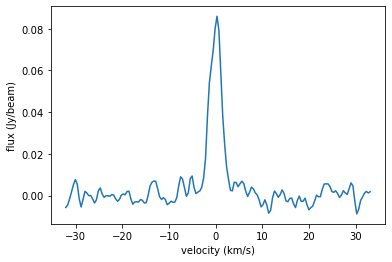

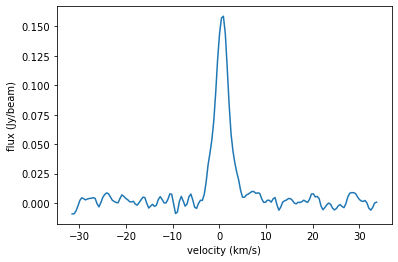

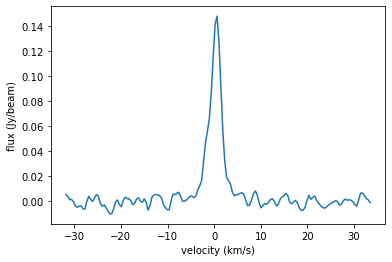

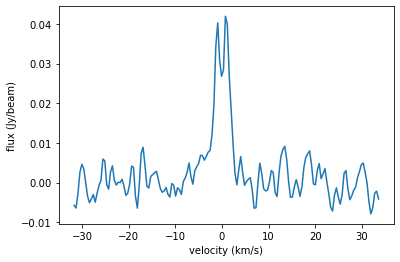

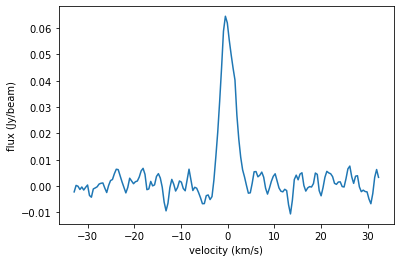

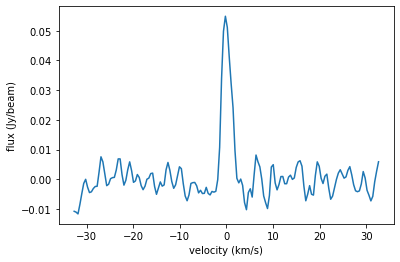

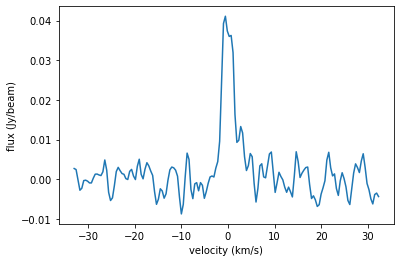

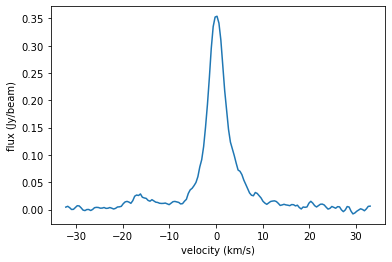

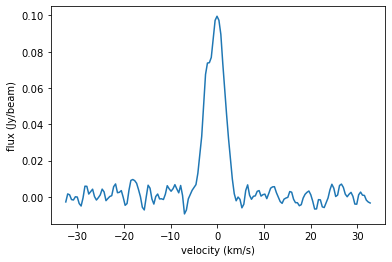

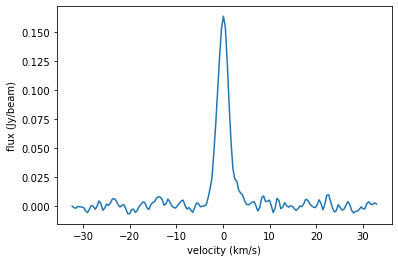

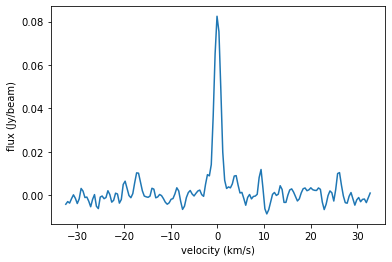

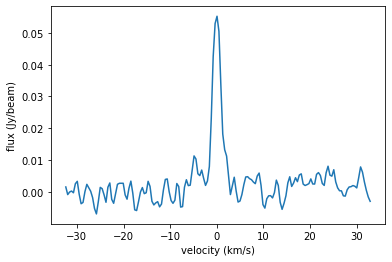

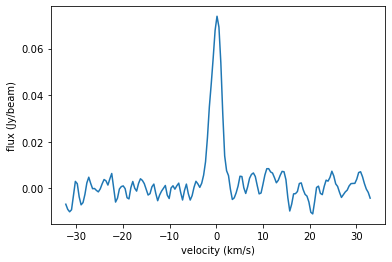

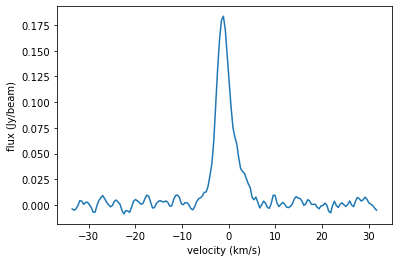

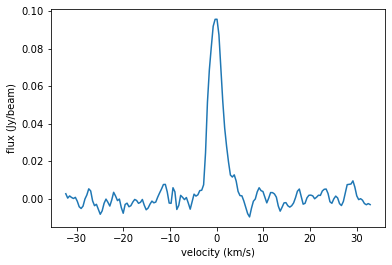

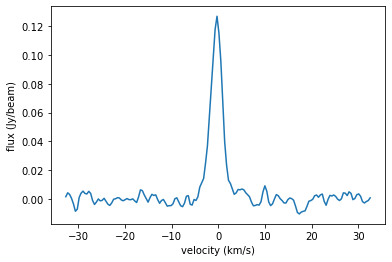

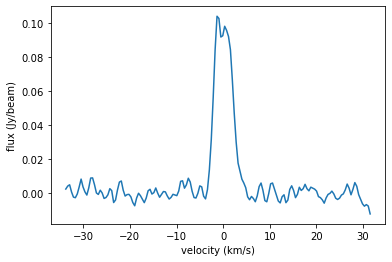

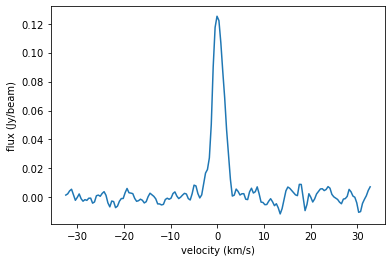

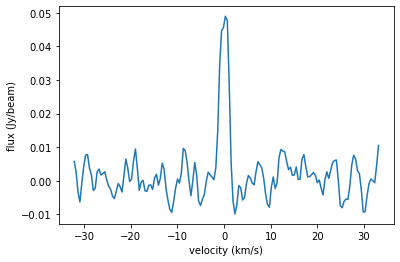

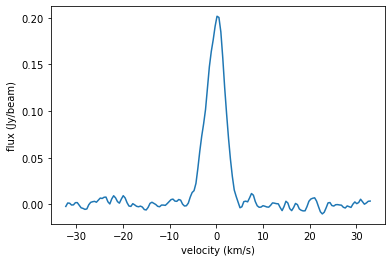

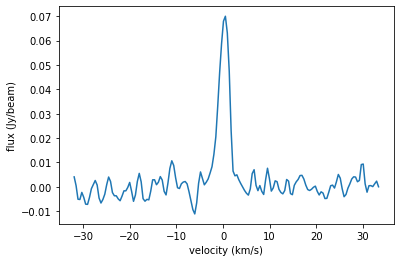

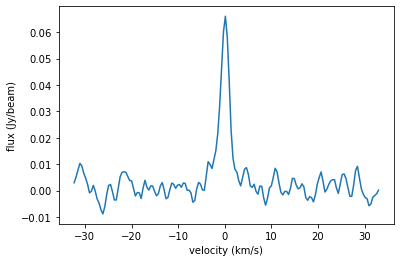

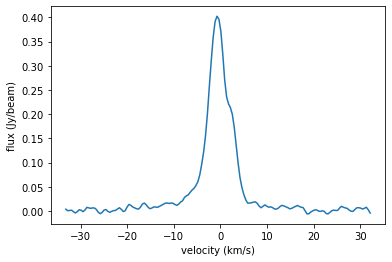

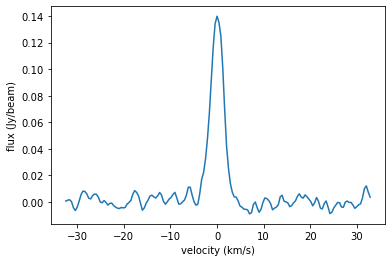

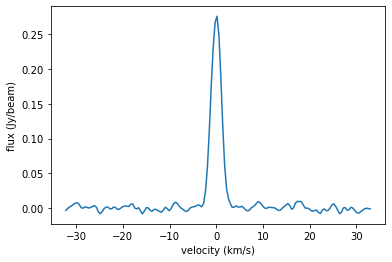

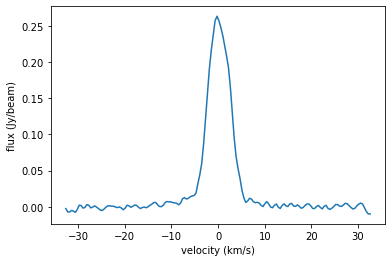

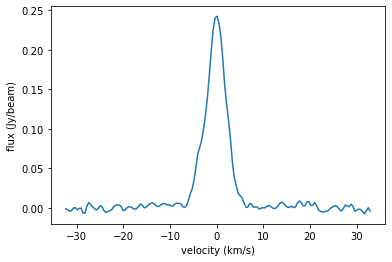

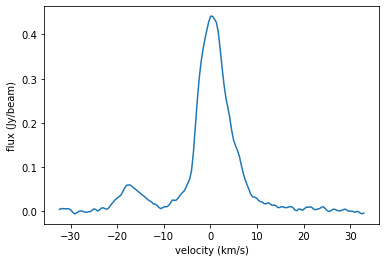

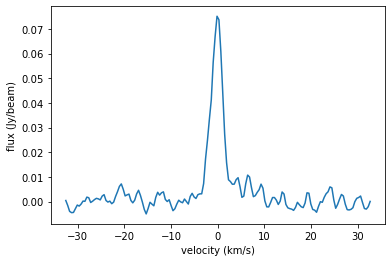

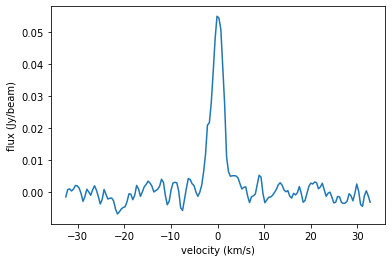

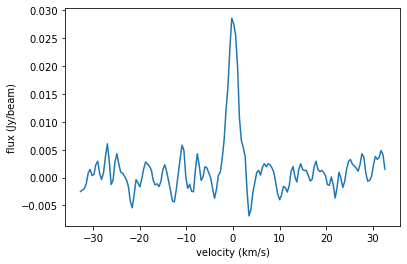

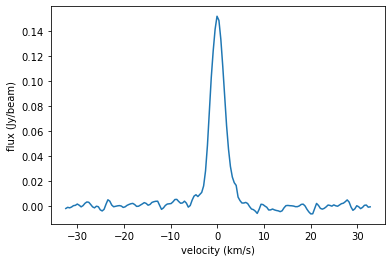

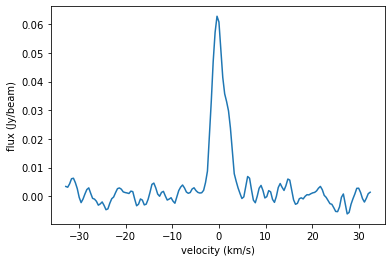

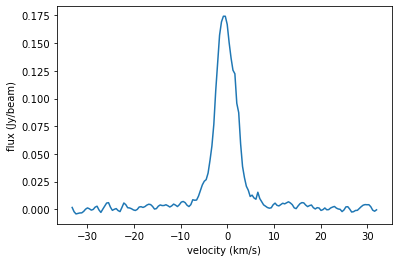

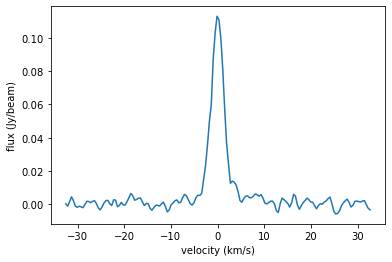

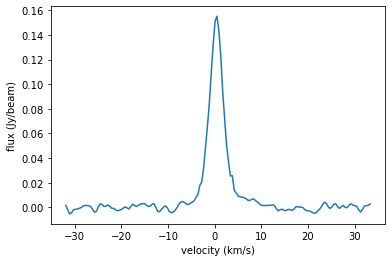

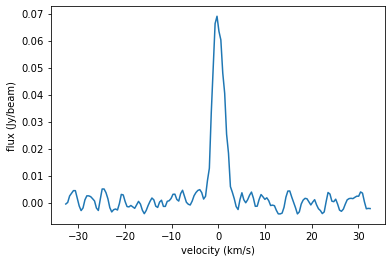

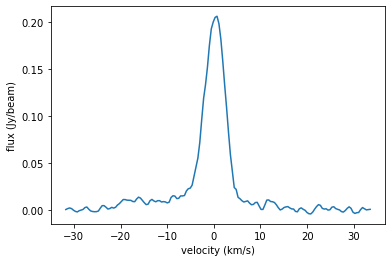

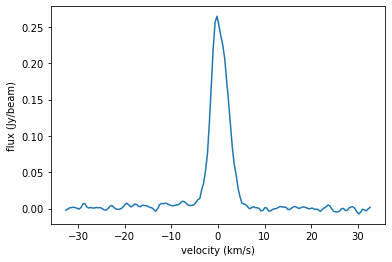

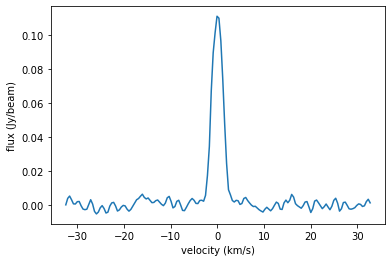

In [21]:
for i in range(len(data)):
    x,y=data_to_xy(data[i])
    x_large,y_large=enlarge3(x,y)
    x_large=np.array(x_large)
    x_large_real=x_large-V_rest_source[i]
    a=x_large_real[0]
    b=x_large_real[1]
    #print(b-a)
    paint(x_large_real,y_large)
    #print(len(x_large))

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


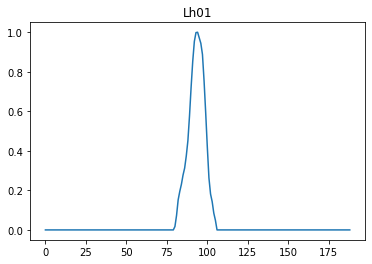

<class 'list'>
<class 'list'>
去除噪声（左边）


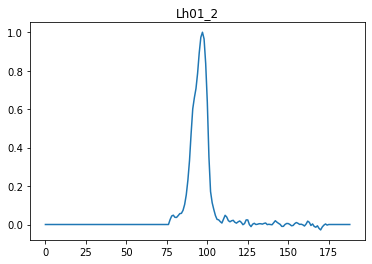

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


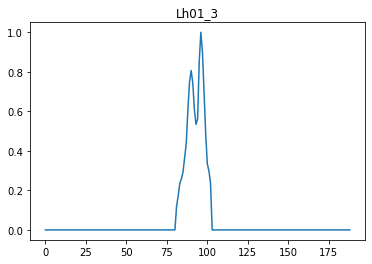

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


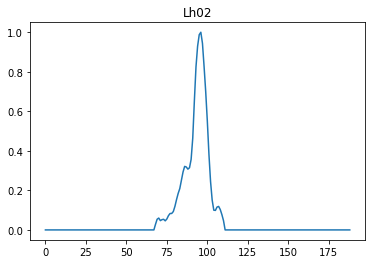

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


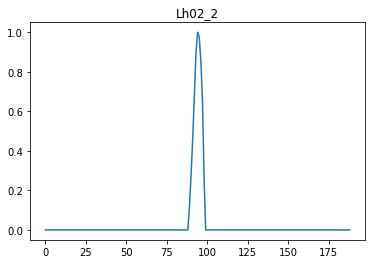

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


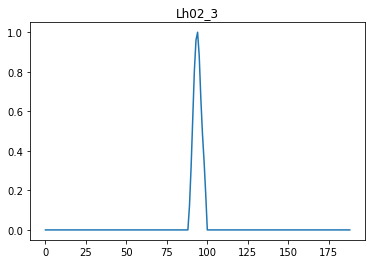

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


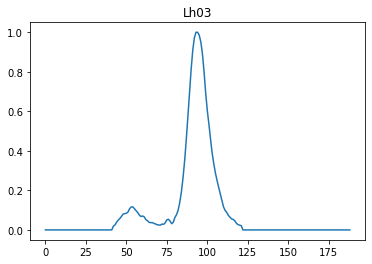

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


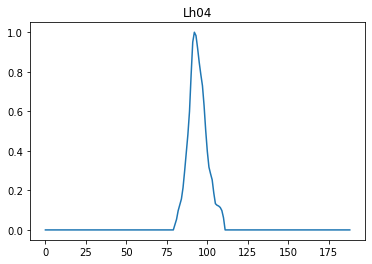

<class 'list'>
<class 'list'>
去除噪声（左边）


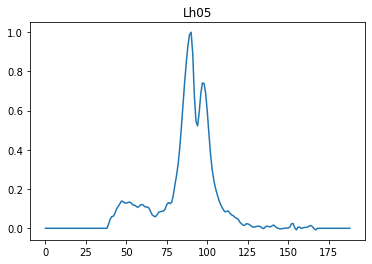

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


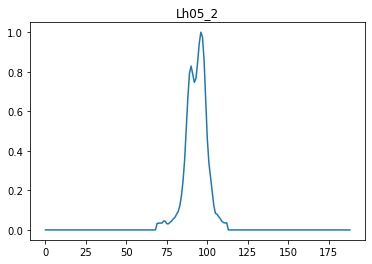

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


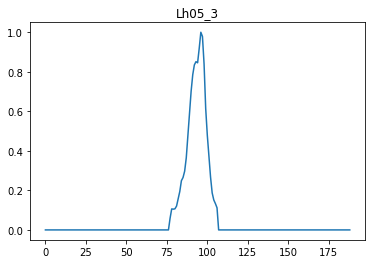

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


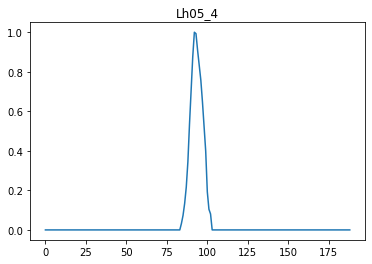

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


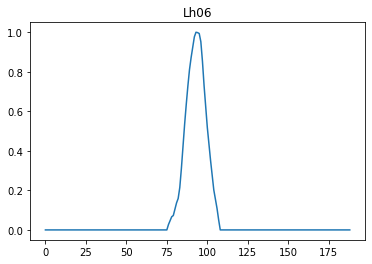

<class 'list'>
<class 'list'>
去除噪声（左边）


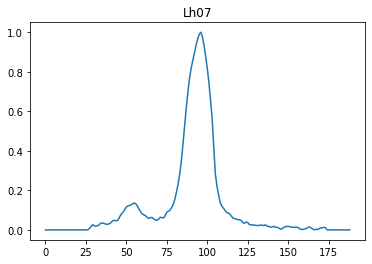

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


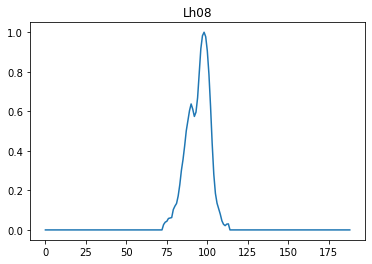

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


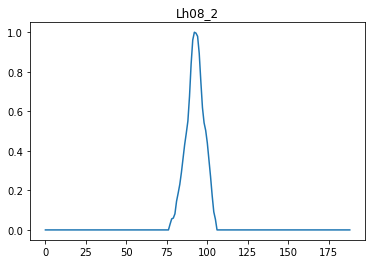

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


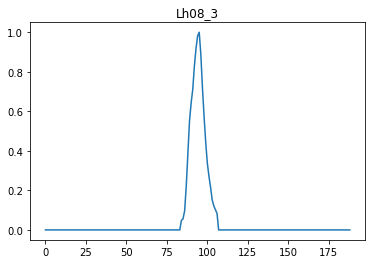

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


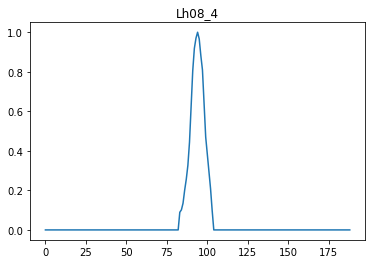

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


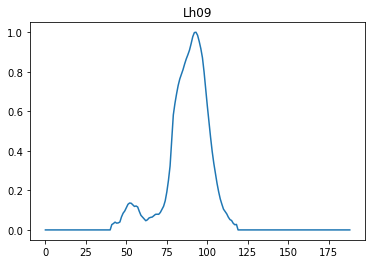

<class 'list'>
<class 'list'>
去除噪声（左边）


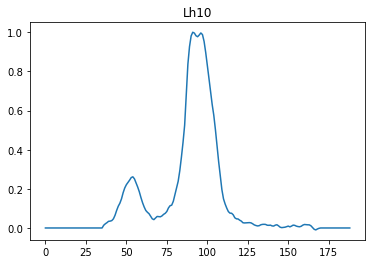

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


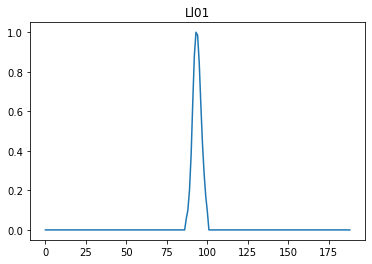

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


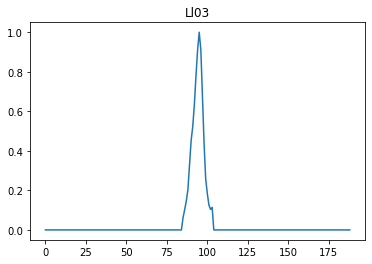

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


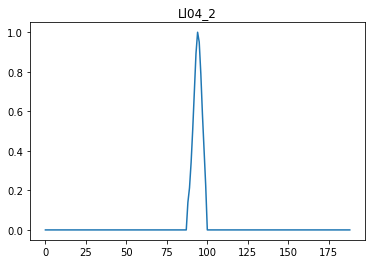

<class 'list'>
<class 'list'>
去除噪声（左边）


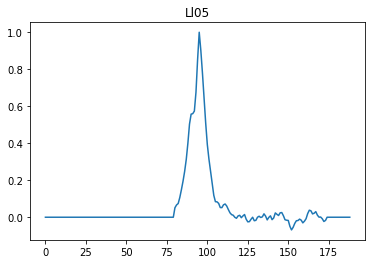

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


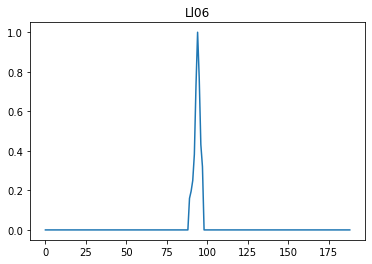

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


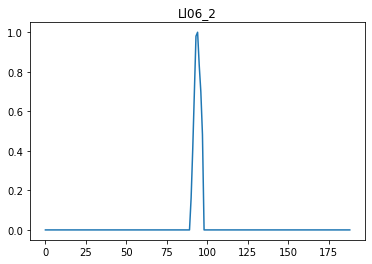

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


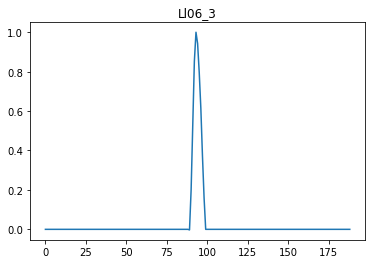

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


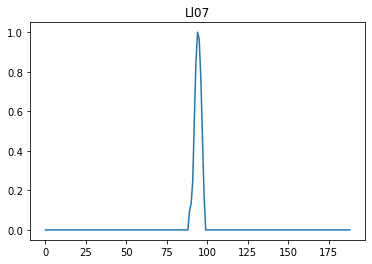

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


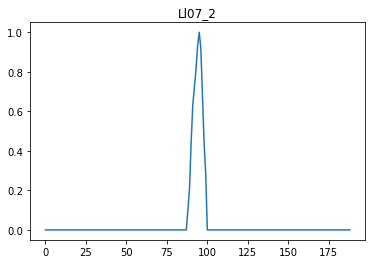

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


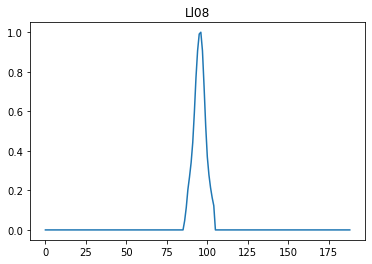

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


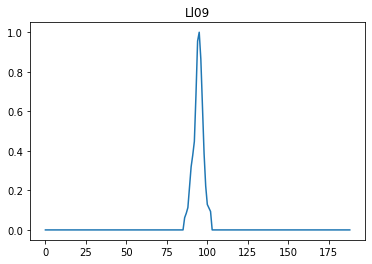

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


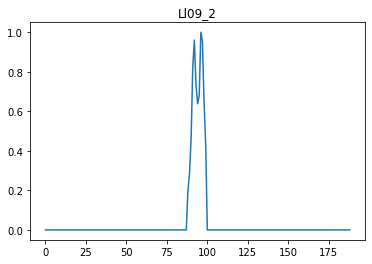

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


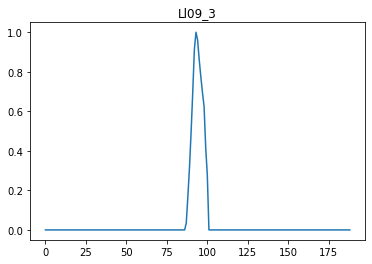

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


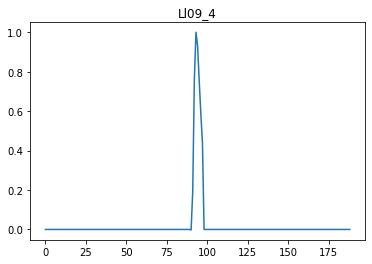

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


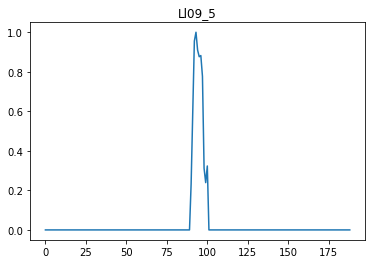

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


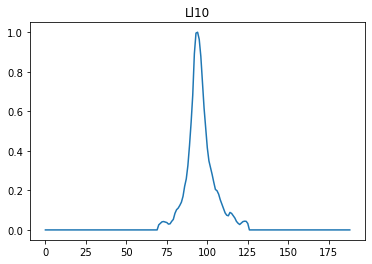

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


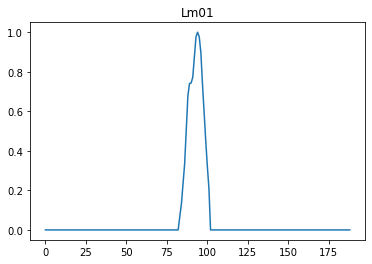

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


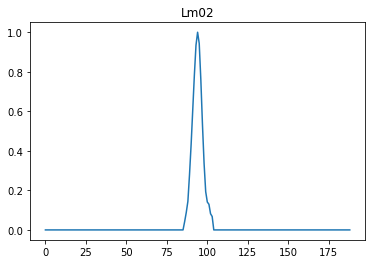

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


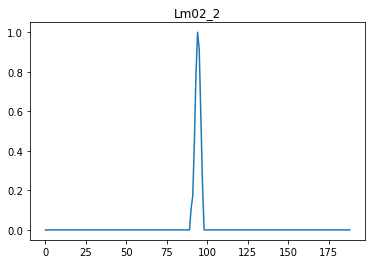

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


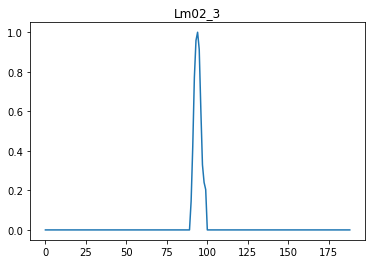

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


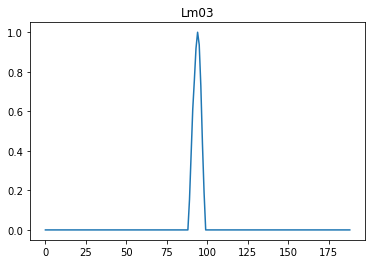

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


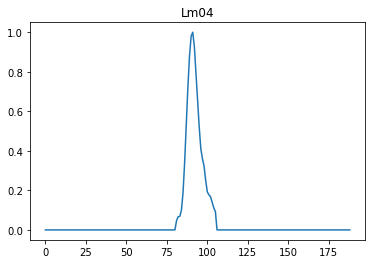

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


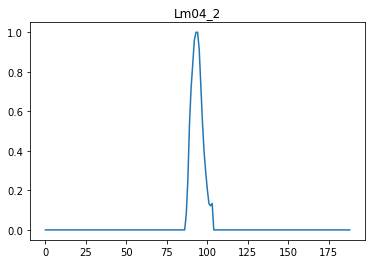

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


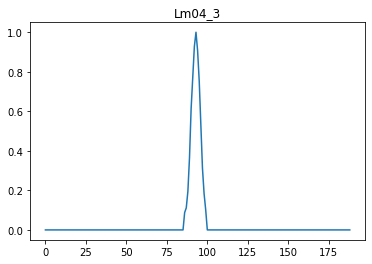

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


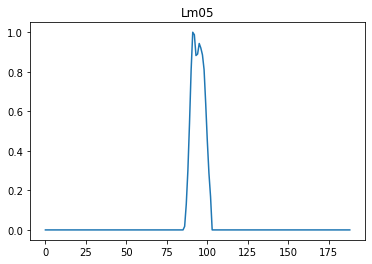

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


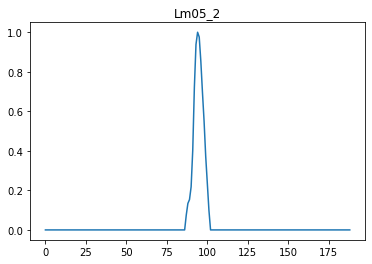

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


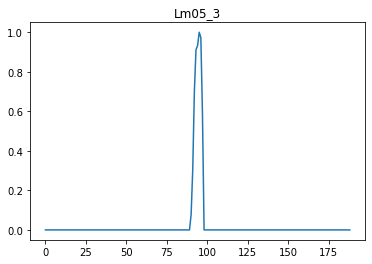

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


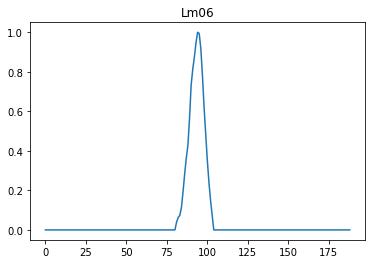

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


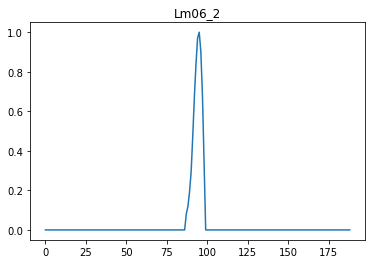

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


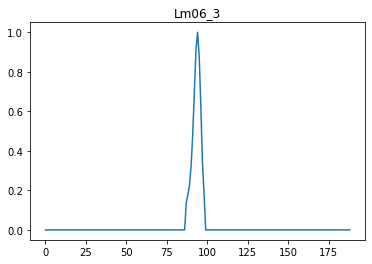

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


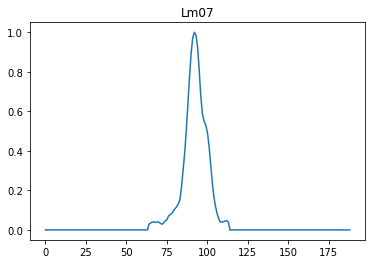

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


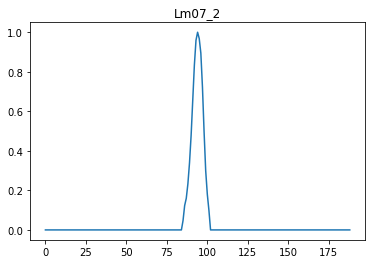

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


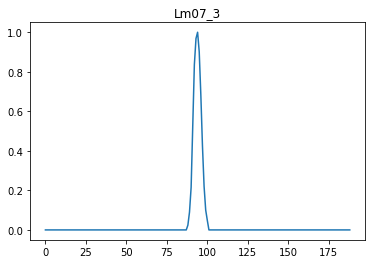

<class 'list'>
<class 'list'>
去除噪声（左边）


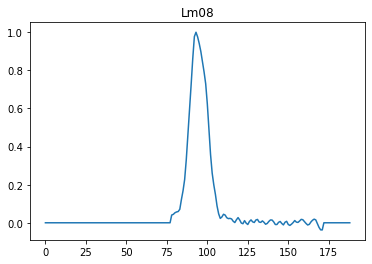

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


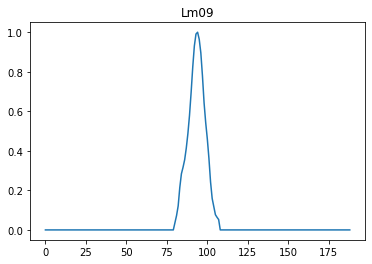

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


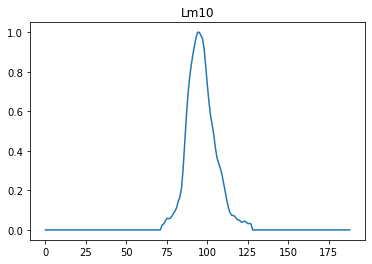

<class 'list'>
<class 'list'>
去除噪声（左边）


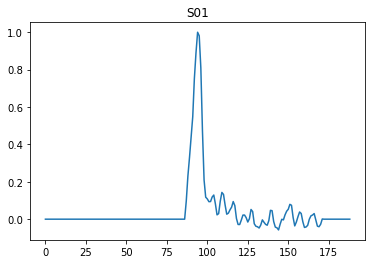

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


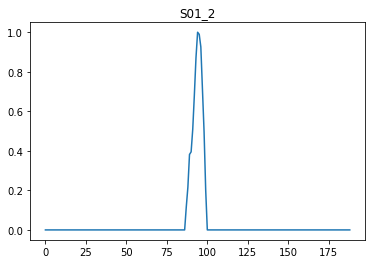

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


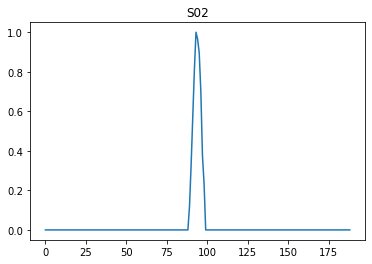

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


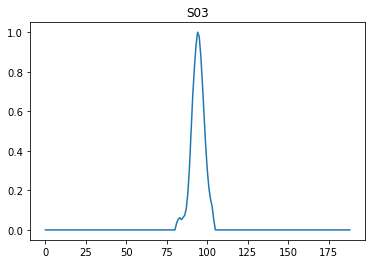

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


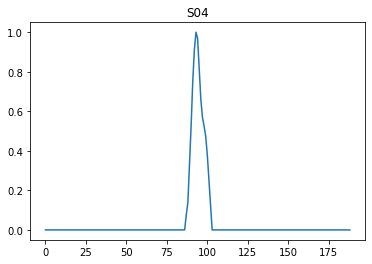

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


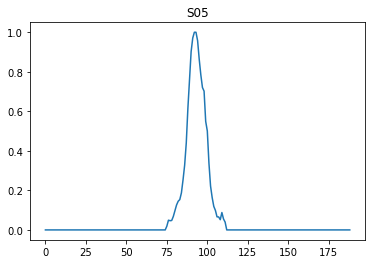

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


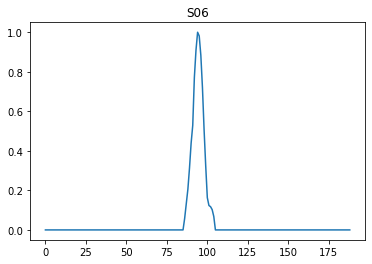

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


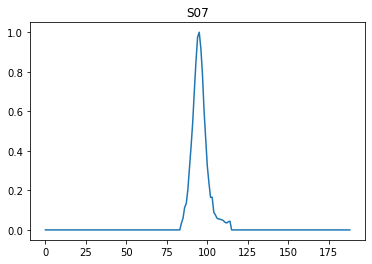

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


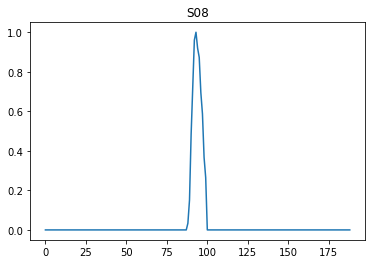

<class 'list'>
<class 'list'>
去除噪声（左边）


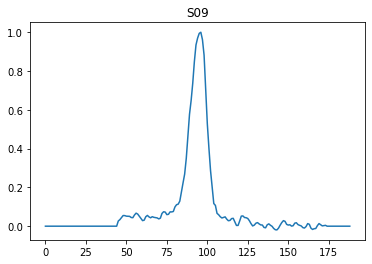

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


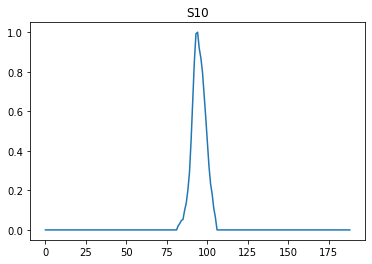

<class 'list'>
<class 'list'>
去除噪声（左边）
去除噪声（右边）


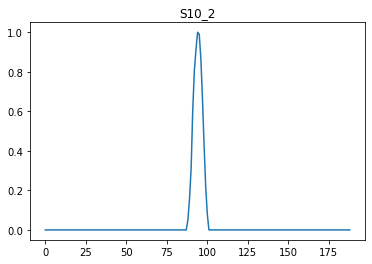

In [22]:
data_flux=[]
for i in range(len(data)):
    x,y=data_to_xy(data[i])
    x_large,y_large=enlarge3(x,y)
    x_large=np.array(x_large)
    x_large_real=x_large-V_rest_source[i]
    #a=x_large_real[0]
    #b=x_large_real[1]
    #print(b-a)
    #paint(x_large_real,y_large)
    copied_list_x = copy.deepcopy(x_large_real)
    x_large_real_1=copied_list_x[::-1]
    y_large_1=y_large[::-1]
    x_large_real_2=x_large_real_1.tolist()
    print(type(x_large_real_2))
    y_flux=duiqi_v(x_large_real_2,y_large_1)
    y_flux_out_noise=remove_3sigma3(x_large_real_2,y_flux,noise_list[i])  # 去掉噪声
    y_flux_out_noise_nol=guiyihua(y_flux_out_noise)  # 归一化
    
    data_flux.append(y_flux_out_noise_nol)
        
    plt.plot(y_flux_out_noise_nol)
    plt.title(name_list[i])
    plt.savefig('./picture/CO/{}_nol.png'.format(name_list[i]))
    plt.show()

In [23]:
#print(data_flux)

In [24]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE,MDS, Isomap,LocallyLinearEmbedding,SpectralEmbedding
from sklearn.decomposition import PCA

In [25]:
# print(len(data_flux))
# for i in range(len(data_flux)):
#     print(len(data_flux[i]))
#     if len(data_flux[i])==0:
#         print("空白列表是：",i)

D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 1440x1440 with 0 Axes>

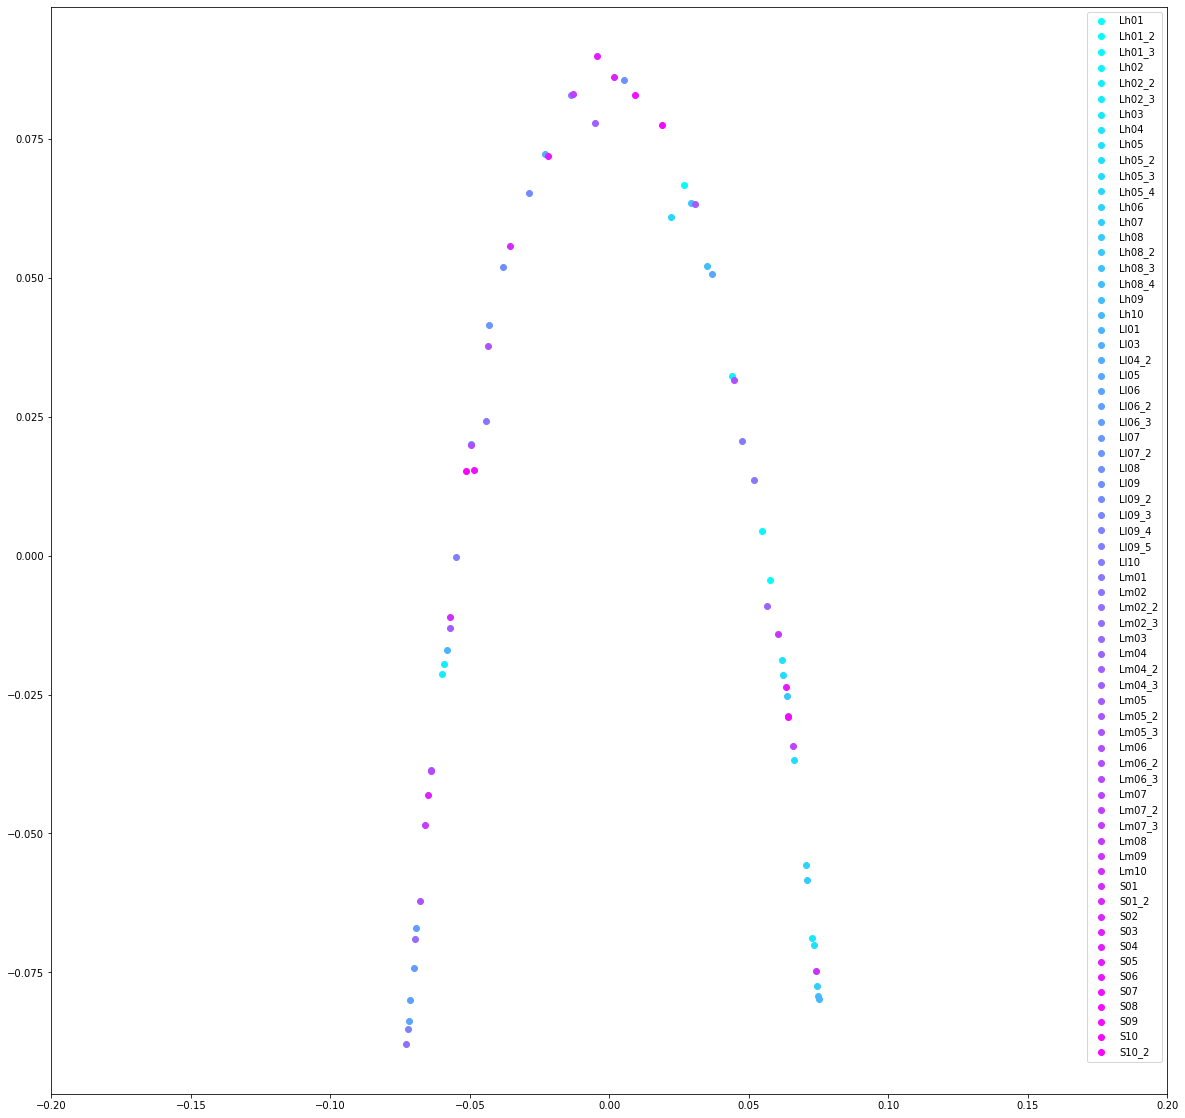

In [26]:
tsne=TSNE(random_state=42)
mds=MDS(n_components=2)
#iso=Isomap(n_components=2,n_neighbors=30)
#local=LocallyLinearEmbedding(n_components=2)
spec=SpectralEmbedding(n_components=2)

digits_tsne=tsne.fit_transform(data_flux)
digits_mds=mds.fit_transform(data_flux)
# digits_iso=iso.fit_transform(data_flux)
# digits_local=local.fit_transform(data_flux)
digits_spec=spec.fit_transform(data_flux)

cmap = plt.cm.cool

plt.figure(figsize=(20,20))
# # t-SNE
# for i in range(len(digits_tsne)):
#     color=cmap(i / len(digits_tsne))
#     plt.scatter(digits_tsne[i, 0], digits_tsne[i, 1], color=color, label=name_list[i])

# plt.legend()
# plt.xlabel('t-SNE feature 0')
# plt.ylabel('t-SNE feature 1')
# plt.savefig('./picture/t-SNE.png')
# plt.show()

# # MDS
# plt.figure(figsize=(20,20))
# # plt.xlim(digits_mds[:,0].min(),digits_mds[:,0].max()+1)
# # plt.ylim(digits_mds[:,1].min(),digits_mds[:,1].max()+1)
# for i in range(len(digits_mds)):
# #     plt.text(digits_mds[i,0],digits_mds[i,1],str(new_name[i]),
# #              color=colors[i],
# #              fontdict={'weight':'bold','size':15})
#     color=cmap(i / len(digits_mds))
#     plt.scatter(digits_mds[i, 0], digits_mds[i, 1], color=color, label=name_list[i])
# # new_texts = [plt.text(x_, y_, text, fontsize=12) for x_, y_, text in zip(digits_mds[:, 0], digits_mds[:, 1], name_list)]
# # adjust_text(new_texts,arrowprops=dict(arrowstyle='->',color='red',lw=1))
# # plt.ylim(-1,1)
# # plt.xlim(-1,1)
# plt.legend()
# plt.savefig('./picture/MDS.png')
# plt.show()

# SpectralEmbedding
plt.figure(figsize=(20,20))
# plt.xlim(digits_spec[:,0].min(),digits_spec[:,0].max()+1)
# plt.ylim(digits_spec[:,1].min(),digits_spec[:,1].max()+1)
plt.xlim(-0.2,0.2)
for i in range(len(digits_spec)):
#     plt.text(digits_spec[i,0],digits_spec[i,1],str(new_name[i]),
#              color=colors[i],
#              fontdict={'weight':'bold','size':15})
    color=cmap(i / len(digits_spec))
    plt.scatter(digits_spec[i, 0], digits_spec[i, 1], color=color, label=name_list[i])
    
# new_texts = [plt.text(x_, y_, text, fontsize=12) for x_, y_, text in zip(digits_spec[:, 0], digits_spec[:, 1], name_list)]
# adjust_text(new_texts,arrowprops=dict(arrowstyle='->',color='red',lw=1))
plt.legend()
plt.savefig('./picture/SpectralEmbedding.png')
plt.show()

In [27]:
# 求平均谱线
def mean_spec(list7):
    mean=[]
    for i in range(len(list7[0])):  # 数据长度
        mean_data=0
        for j in range(len(list7)):   # 有几组数据
            mean_data+=list7[j][i]
        mean.append(mean_data/len(list7))
    return mean

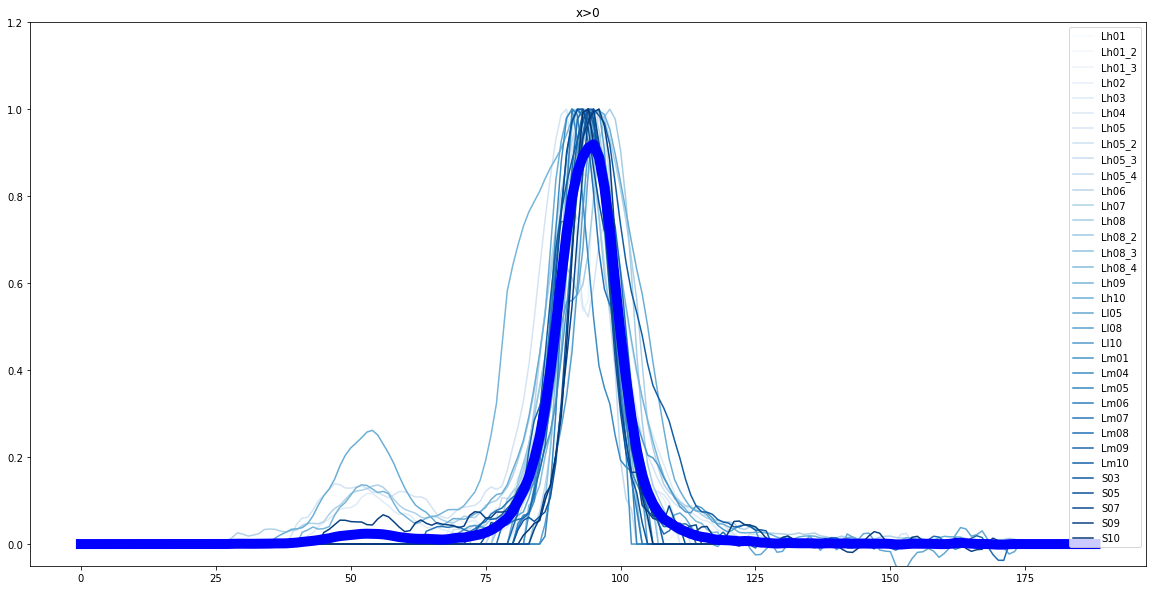

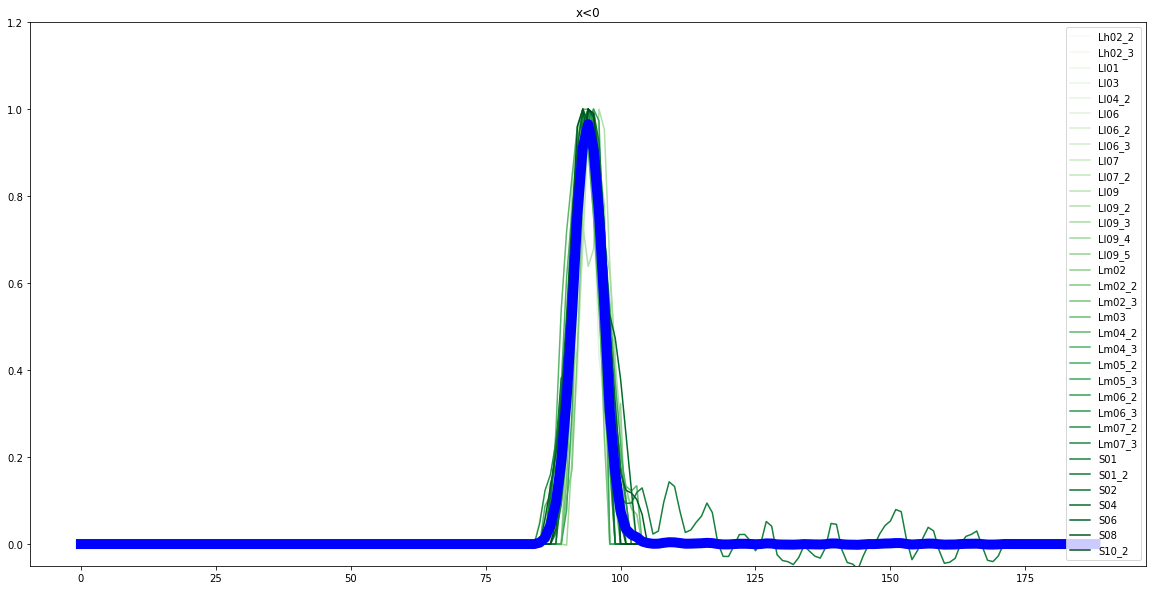

In [28]:
#print(digits_spec)
cate1=[]
name1=[]
cate2=[]
name2=[]
cate3=[]
name3=[]
cate4=[]
name4=[]
mean1=[]
mean2=[]
mean3=[]
mean4=[]
for i in range(len(digits_spec)):
    if digits_spec[i,0]>0.00:
        cate1.append(data_flux[i])
        name1.append(name_list[i])
        
    elif digits_spec[i,0]<0.00:
        cate2.append(data_flux[i])
        name2.append(name_list[i])
        
#     elif digits_spec[i,0]<0.01 and digits_spec[i,1]<0:
#         cate3.append(data_flux[i])
#         name3.append(name_list[i])
        
#     elif digits_spec[i,0]<0.01 and digits_spec[i,1]>0.00:
#         cate4.append(data_flux[i])
#         name4.append(name_list[i])

cmap1=plt.cm.Blues
cmap2=plt.cm.Greens
cmap3=plt.cm.Reds_r
cmap4=plt.cm.Oranges

# 求平均光谱
mean1=mean_spec(cate1)
mean2=mean_spec(cate2)
#mean3=mean_spec(cate3)
#mean4=mean_spec(cate4)

# 画图
plt.figure(figsize=(20,10))
for i in range(len(cate1)): 
    color1 = cmap1(i / len(cate1))
    plt.plot(cate1[i],color=color1,label=name1[i])

plt.ylim(-0.05,1.2)
plt.plot(mean1,linewidth=10,color="b")
plt.title("x>0")
plt.legend()
plt.show()


plt.figure(figsize=(20,10))
for i in range(len(cate2)):
    color2 = cmap2(i / len(cate2))
    plt.plot(cate2[i],color=color2,label=name2[i])

plt.plot(mean2,linewidth=10,color="b")
#plt.xlim(25,150)
plt.ylim(-0.05,1.2)
plt.title("x<0")
plt.legend()
plt.show()


# plt.figure(figsize=(20,10))
# for i in range(len(cate3)):
#     color3 = cmap3(i / len(cate3))
#     plt.plot(cate3[i],color=color3,label=name3[i])

# #plt.xlim(25,150)
# plt.ylim(-0.05,1.5)
# plt.plot(mean3,linewidth=10,color="b")
# plt.title("x>0 and x<0.05")
# plt.legend()
# plt.show()


# plt.figure(figsize=(20,10))
# for i in range(len(cate4)):
#     color4 = cmap4(i / len(cate4))
#     plt.plot(cate4[i],color=color4,label=name4[i])

# #plt.xlim(25,150)
# plt.ylim(-0.05,1.2)
# #plt.plot(mean4,linewidth=10,color="b")
# plt.title("x<0 and y>00")
# plt.legend()
# plt.show()

In [29]:
# 计算半高全宽
def calculate_fwhm(x, y, n): # n是取多少高
    # 确保x和y为NumPy数组
    x = np.asarray(x)
    y = np.asarray(y)
    
    # 找到峰值位置
    peak_index = np.argmax(y)
    peak_value = y[peak_index]
    half_max = peak_value*n

    # 处理左侧交点
    i_left = peak_index - 1
    while i_left >= 0 and y[i_left] > half_max:
        i_left -= 1
    
    if i_left < 0:
        raise ValueError("未找到左侧半高交点，请检查数据。")
    if i_left + 1 >= len(y):
        raise ValueError("左侧交点超出范围。")
    
    # 线性插值计算左侧交点x坐标
    dx_left = x[i_left + 1] - x[i_left]
    dy_left = y[i_left + 1] - y[i_left]
    x_left = x[i_left] + (half_max - y[i_left]) * dx_left / dy_left

    # 处理右侧交点
    i_right = peak_index + 1
    while i_right < len(y) and y[i_right] >= half_max:
        i_right += 1
    
    if i_right >= len(y):
        raise ValueError("未找到右侧半高交点，请检查数据。")
    if i_right - 1 < peak_index:
        raise ValueError("右侧交点无效。")
    
    # 线性插值计算右侧交点x坐标
    dx_right = x[i_right] - x[i_right - 1]
    dy_right = y[i_right] - y[i_right - 1]
    x_right = x[i_right - 1] + (half_max - y[i_right - 1]) * dx_right / dy_right
    return x_right - x_left

In [30]:
# 面积
def area(x,y):
    a=np.trapz(y, x)
    return a

In [31]:
# 面积比值
def a_ratio(x,y,n):
# 找到对应高度的横坐标
    # 确保x和y为NumPy数组
    x = np.asarray(x)
    y = np.asarray(y)
    
    # 找到峰值位置
    peak_index = np.argmax(y)
    peak_value = y[peak_index]
    half_max = peak_value*n

    # 处理左侧交点
    i_left = peak_index - 1
    while i_left >= 0 and y[i_left] > half_max:
        i_left -= 1
    
    if i_left < 0:
        raise ValueError("未找到左侧半高交点，请检查数据。")
    if i_left + 1 >= len(y):
        raise ValueError("左侧交点超出范围。")
    
    # 线性插值计算左侧交点x坐标
    dx_left = x[i_left + 1] - x[i_left]
    dy_left = y[i_left + 1] - y[i_left]
    x_left = x[i_left] + (half_max - y[i_left]) * dx_left / dy_left

    # 处理右侧交点
    i_right = peak_index + 1
    while i_right < len(y) and y[i_right] >= half_max:
        i_right += 1
    
    if i_right >= len(y):
        raise ValueError("未找到右侧半高交点，请检查数据。")
    if i_right - 1 < peak_index:
        raise ValueError("右侧交点无效。")
    
    # 线性插值计算右侧交点x坐标
    dx_right = x[i_right] - x[i_right - 1]
    dy_right = y[i_right] - y[i_right - 1]
    x_right = x[i_right - 1] + (half_max - y[i_right - 1]) * dx_right / dy_right
    
# 计算面积
    x_left_int=int(x_left)
    x_right_int=int(x_right)
    left=np.arange(0,x_left_int+1)
    right=np.arange(x_right_int+1,x[-1]+1)
    area_left=np.trapz( y[0:x_left_int+1],left)
    area_right=np.trapz(y[x_right_int+1:x[-1]+1],right)
    area_middle=(x_right-x_left)*half_max
    return area_left+area_right

In [32]:
# 把某部分按x增大顺序排好
sort_x_right=[]    # 按x顺序排列的下面三个列表的组合
cate1_x_right=[]  # 谱线流量
digits_right_x=[]  # 分类结果中该谱线的x值
name_right_x=[]    # 记录谱线的名字

for i in range(len(digits_spec)):
    #if digits_spec[i,0]>0 :
    digits_right_x.append(digits_spec[i,0])
    cate1_x_right.append(data_flux[i])
    name_right_x.append(name_list[i])
        
        
x_right=zip(digits_right_x,cate1_x_right,name_right_x)
sorted_x_right = sorted(x_right,key=lambda x:x[0])
result = zip(*sorted_x_right)
sorted_right_x, sorted_right_flux,sorted_right_name = [list(x) for x in result]  # 按x增大顺序排列的x值，谱线流量，谱线名字

print(len(sorted_right_flux))

68


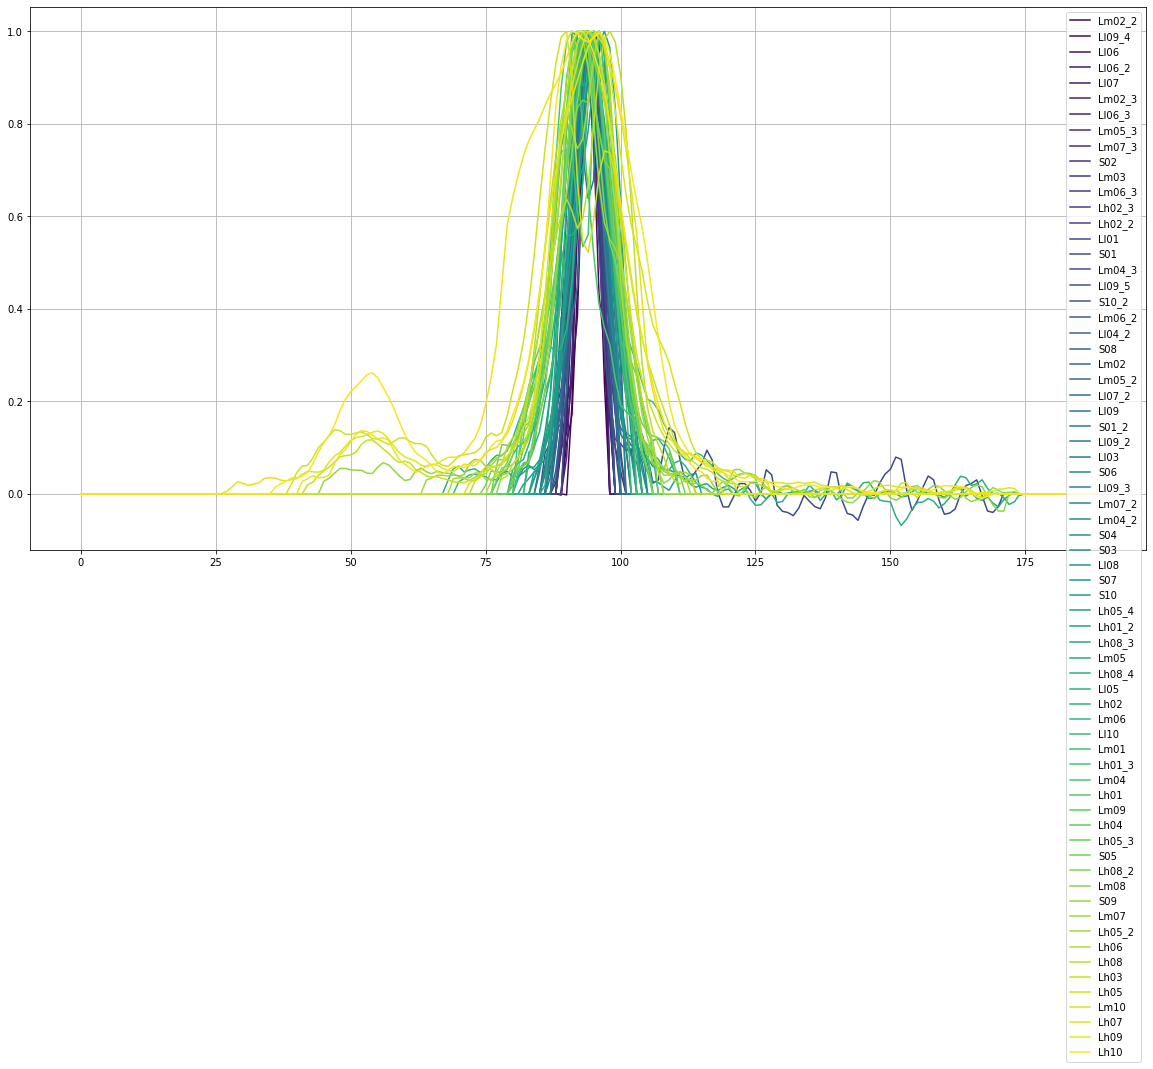

In [33]:
# 画图
cmap = plt.cm.viridis
plt.figure(figsize=(20,10))

for i in range(len(sorted_right_flux)):   # 算各种物理量
    
    
    color = cmap(i / len(sorted_right_flux))
    plt.plot(sorted_right_flux[i],color=color,label=sorted_right_name[i])
    #plt.title("x value:{}".format(sorted_so2_x[i]))
    #plt.title("name:{}".format(sorted_so2_name[i]))
    #plt.savefig('./picture/sorted_x-{}.png'.format(i + 1))


plt.legend(loc="upper right")
plt.grid()
plt.show()

#print(linewidth_x)

In [34]:
def calculate_peak_valley_differences(spectrum, prominence_threshold=5):
    """
    计算光谱中两个主峰与它们之间的谷值的高度差。
    
    参数:
        spectrum (np.ndarray): 一维数组，表示光谱数据。
        prominence_threshold (float): 峰的最小突出度阈值。
        
    返回:
        (diff_left, diff_right, valley_idx): 左峰与谷的高度差，右峰与谷的高度差，谷的位置索引。
        如果没有找到足够峰，返回(None, None, None)。
    """
    # 检测峰及其突出度
    peaks, properties = find_peaks(spectrum, prominence=prominence_threshold)
    
    if len(peaks) < 2:
        return 0, 0, 0  # 不足两个峰
    
    # 根据突出度选择前两个主峰
    prominences = properties['prominences']
    peak_indices = sorted(zip(prominences, peaks), key=lambda x: -x[0])[:2]
    selected_peaks = sorted([pi[1] for pi in peak_indices])  # 按位置排序
    
    left_peak, right_peak = selected_peaks
    
    # 查找两个峰之间的谷值
    valley_segment = spectrum[left_peak:right_peak + 1]
    valley_rel_idx = np.argmin(valley_segment)
    valley_idx = left_peak + valley_rel_idx
    
    # 计算高度差
    diff_left = spectrum[left_peak] - spectrum[valley_idx]
    diff_right = spectrum[right_peak] - spectrum[valley_idx]
    
    return diff_left, diff_right, valley_idx


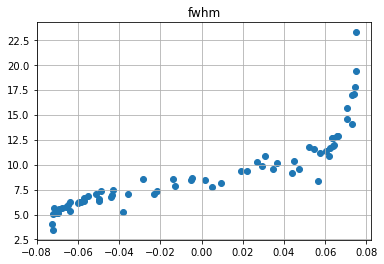

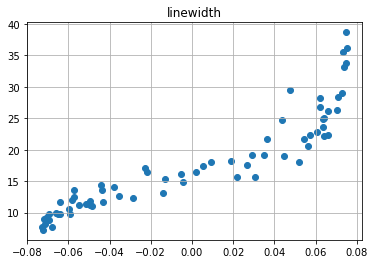

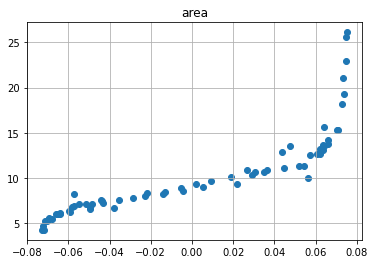

In [35]:
fwhm_full=[]
linewidth_full=[]
area_full=[]
# area_full2=[]
flux_x = np.arange(0, len(sorted_right_flux[1]),1)
#print(flux_x)
for i in range(len(sorted_right_flux)):
    fwhm=calculate_fwhm(flux_x,sorted_right_flux[i],0.5)
    fwhm_full.append(fwhm)
    linewid=calculate_fwhm(flux_x,sorted_right_flux[i],0.1)
    linewidth_full.append(linewid)
    area_full.append(area(flux_x,sorted_right_flux[i]))
#     area2 = simpson_integral(flux_x,sorted_flux[i])
#     area_full2.append(area2)

# 画出所有谱线x值和不同属性的散点图
plt.scatter(sorted_right_x,fwhm_full)
#plt.xlim(0.05,0.16)
plt.title("fwhm")
plt.grid()
plt.show()

plt.scatter(sorted_right_x,linewidth_full)
#plt.xlim(0.05,0.16)
plt.title("linewidth")
plt.grid()
plt.show()

plt.scatter(sorted_right_x,area_full)
#plt.xlim(0.05,0.16)
plt.title("area")
plt.grid()
plt.show()


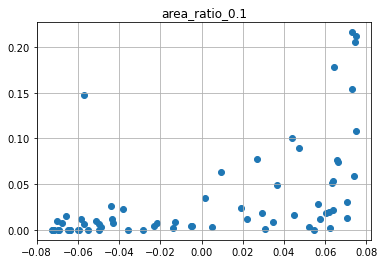

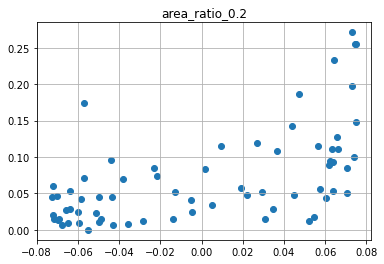

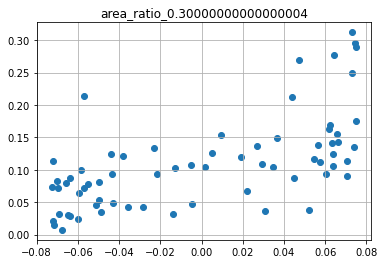

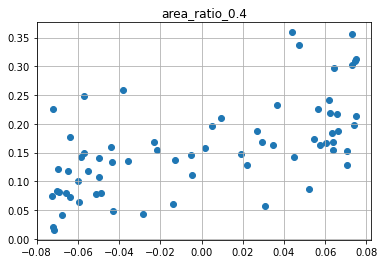

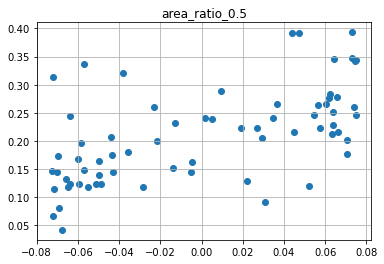

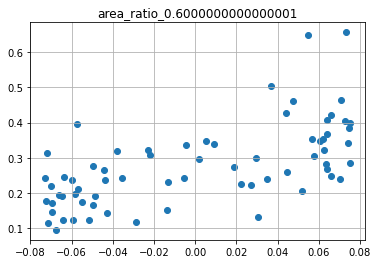

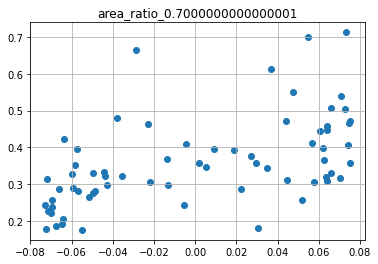

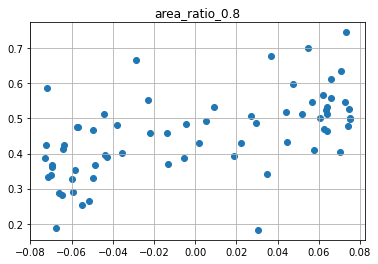

In [36]:
# 面积比例
for n in range(1,9):
    area_ratio=[]
    for i in range(len(sorted_right_x)):
        area_ratio.append(a_ratio(flux_x,sorted_right_flux[i],n*0.1)/area(flux_x,sorted_right_flux[i]))
    plt.scatter(sorted_right_x,area_ratio)
    #plt.xlim(0.05,0.16)
    plt.title("area_ratio_{}".format(n*0.1))
    plt.grid()
    plt.show()

In [37]:
# 把某部分按y增大顺序排好
sort_y=[]    # 按x顺序排列的下面三个列表的组合
cate1_y=[]  # 谱线流量
digits_y=[]  # 分类结果中该谱线的x值
name_y=[]    # 记录谱线的名字

for i in range(len(digits_spec)):
#     if digits_spec[i,0]<0 :
    digits_y.append(digits_spec[i,1])
    cate1_y.append(data_flux[i])
    name_y.append(name_list[i])
        
        
y_=zip(digits_y,cate1_y,name_y)
sort_y = sorted(y_,key=lambda x:x[0])
result_y = zip(*sort_y)
sorted_y, sorted_y_flux,sorted_y_name = [list(x) for x in result_y]  # 按x增大顺序排列的x值，谱线流量，谱线名字

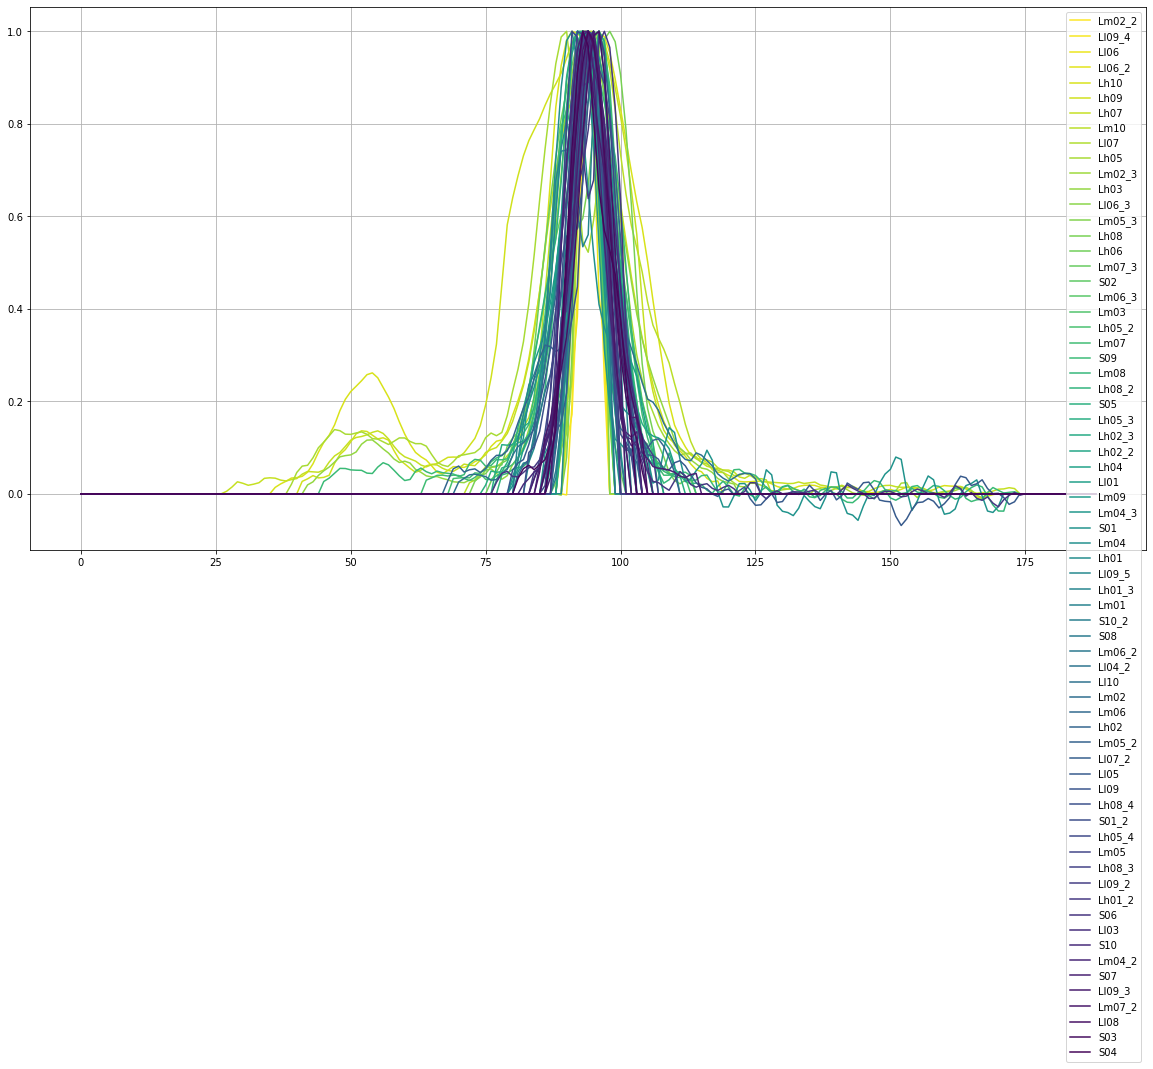

In [38]:
cmap = plt.cm.viridis_r
plt.figure(figsize=(20,10))

for i in range(len(sorted_y_flux)):   # 算各种物理量
    
    
    color = cmap(i / len(sorted_y_flux))
    plt.plot(sorted_y_flux[i],color=color,label=sorted_y_name[i])
    #plt.title("x value:{}".format(sorted_so2_x[i]))
    #plt.title("name:{}".format(sorted_so2_name[i]))
    #plt.savefig('./picture/sorted_x-{}.png'.format(i + 1))


plt.legend(loc="upper right")
plt.grid()
plt.show()

#print(linewidth_x)

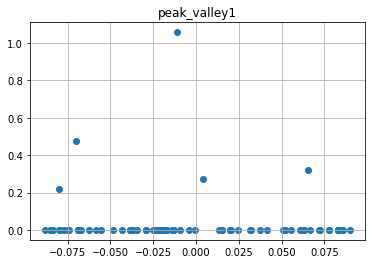

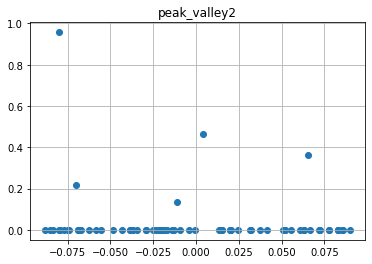

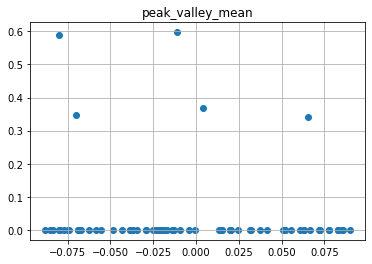

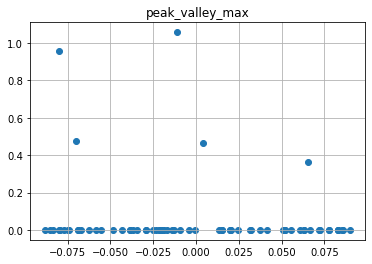

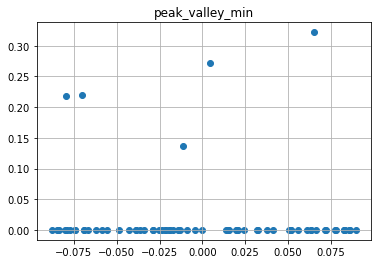

In [39]:
peak_valley1=[]
peak_valley2=[]
peak_valley_mean=[]
peak_valley_max=[]
peak_valley_min=[]

for i in range(len(sorted_y)):
    diff_l,diff_r,valley_i=calculate_peak_valley_differences(sorted_y_flux[i], prominence_threshold=0.1)
    peak_valley1.append(diff_l)
    peak_valley2.append(diff_r)
    peak_valley_mean.append((diff_l+diff_r)/2)
    peak_valley_max.append(max(diff_l,diff_r))
    peak_valley_min.append(min(diff_l,diff_r))
#     plt.plot(sorted_y_flux[i])
#     print("第{}个光谱的峰深为：".format(i),diff_l,diff_r)
#     plt.show()

plt.scatter(sorted_y,peak_valley1)
#plt.xlim(0.05,0.16)
plt.title("peak_valley1")
plt.grid()
plt.show()

plt.scatter(sorted_y,peak_valley2)
#plt.xlim(0.05,0.16)
plt.title("peak_valley2")
plt.grid()
plt.show()

plt.scatter(sorted_y,peak_valley_mean)
#plt.xlim(0.05,0.16)
plt.title("peak_valley_mean")
plt.grid()
plt.show()

plt.scatter(sorted_y,peak_valley_max)
#plt.xlim(0.05,0.16)
plt.title("peak_valley_max")
plt.grid()
plt.show()

plt.scatter(sorted_y,peak_valley_min)
#plt.xlim(0.05,0.16)
plt.title("peak_valley_min")
plt.grid()
plt.show()

In [40]:
# 均方根
def ruggedness_rms(y):
    dy = np.diff(y)
    return np.sqrt(np.mean(dy**2))

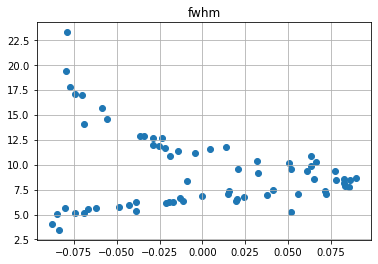

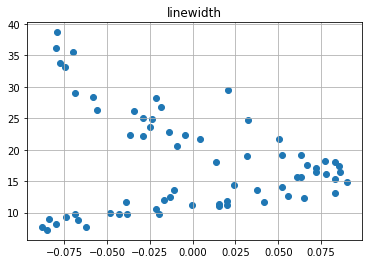

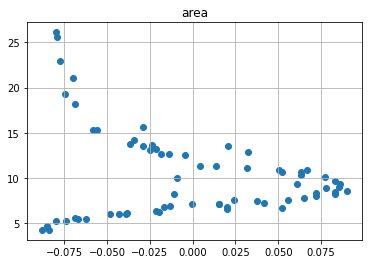

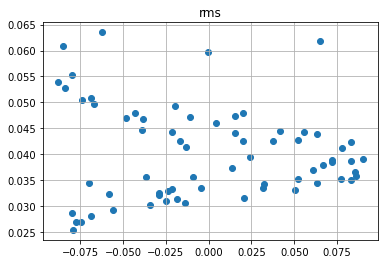

In [41]:
fwhm_y=[]
linewidth_y=[]
area_y=[]
rms_y=[]
# area_full2=[]
flux_x = np.arange(0, len(sorted_right_flux[1]),1)
#print(flux_x)
for i in range(len(sorted_y_flux)):
    fwhmy=calculate_fwhm(flux_x,sorted_y_flux[i],0.5)
    fwhm_y.append(fwhmy)
    linewidy=calculate_fwhm(flux_x,sorted_y_flux[i],0.1)
    linewidth_y.append(linewidy)
    area_y.append(area(flux_x,sorted_y_flux[i]))
    rms_y.append(ruggedness_rms(sorted_y_flux[i]))
#     area2 = simpson_integral(flux_x,sorted_flux[i])
#     area_full2.append(area2)

# 画出所有谱线x值和不同属性的散点图
plt.scatter(sorted_y,fwhm_y)
#plt.xlim(0.05,0.16)
plt.title("fwhm")
plt.grid()
plt.show()

plt.scatter(sorted_y,linewidth_y)
#plt.xlim(0.05,0.16)
plt.title("linewidth")
plt.grid()
plt.show()

plt.scatter(sorted_y,area_y)
#plt.xlim(0.05,0.16)
plt.title("area")
plt.grid()
plt.show()

plt.scatter(sorted_y,rms_y)
#plt.xlim(0.05,0.16)
plt.title("rms")
plt.grid()
plt.show()

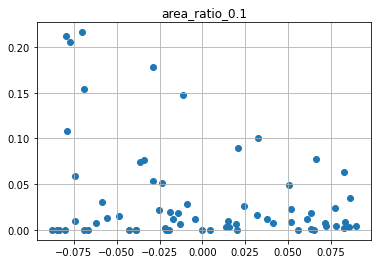

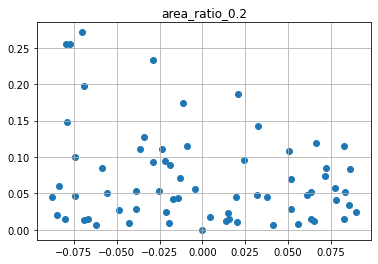

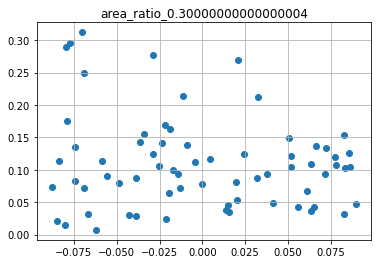

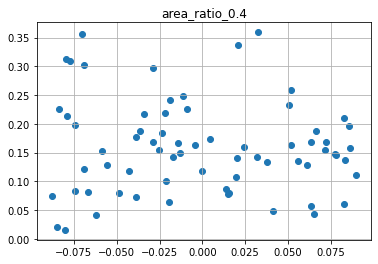

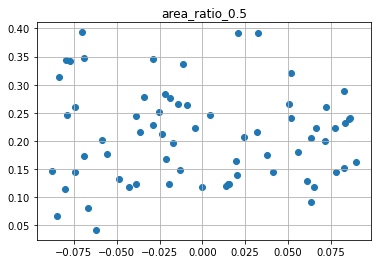

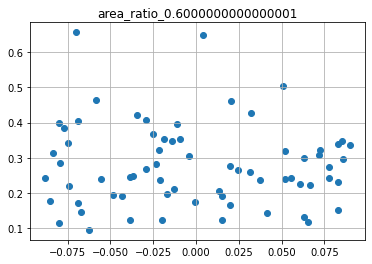

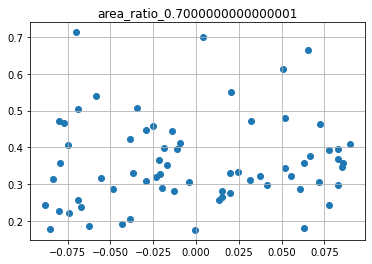

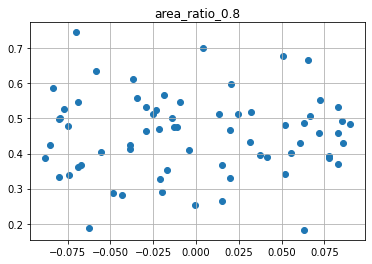

In [42]:
flux_x = np.arange(0, len(sorted_y_flux[1]),1)
for n in range(1,9):
    area_full_y=[]
    area_ratio_y=[]
    for i in range(len(sorted_y)):
        area_full_y.append(area(flux_x,sorted_y_flux[i]))
        area_ratio_y.append(a_ratio(flux_x,sorted_y_flux[i],n*0.1)/area(flux_x,sorted_y_flux[i]))
    plt.scatter(sorted_y,area_ratio_y)
    #plt.xlim(0.05,0.16)
    plt.title("area_ratio_{}".format(n*0.1))
    plt.grid()
    plt.show()